## 1.. How to read data using sqlite3
https://blog.exploratory.io/accessing-sqlite-with-rsqlite-and-querying-with-dplyr-in-r-script-7eecf1e1b5b0

In [1]:
# install.packages('DBI')
# install.packages('RSQLite')

In [1]:
library(DBI)
library(RSQLite)

In [ ]:
help(dbConnect)

## Create a connection to a DBMS

In [2]:
args(dbConnect)

function (drv, ...) 
NULL

In [ ]:
"

drv: This is the database driver object. 
    It represents the interface to a specific database management system (DBMS)
     Various DBMS-specific drivers are RSQLite::SQLite() , RMySQL::MySQL() and RPostgreSQL::PostgreSQL()..

    As I want connection with SQLite database , 
    hence we have to use SQLite() driver which belongs to RSQLite package..
    ie RSQLite :: SQLite()

"

In [4]:
# very first u have to create a connection to our SQLite database

In [3]:

# db_file = "Z:/2.. Zomato/Datasets/zomato_rawdata.sqlite"  # OLD PC


db_file = "R:/All_Datasets/2.. Zomato/Datasets/zomato_rawdata.sqlite"
con = DBI :: dbConnect(SQLite(), db_file)

## while mentioning file path , mention either '/' or '\\' or '//'
## Note : '\'(single backward slash) will not work .. ie R uses forward slash instead of single backward slash in filename

# Now 'con' is the SQLite database connection object

In [4]:
class(con)

# Now 'con' is the SQLite database connection object

[1] "SQLiteConnection"
attr(,"package")
[1] "RSQLite"

In [6]:
"

dbConnect function to connect to the SQLite database, specifying SQLite() as the driver 
and providing the database file name using the dbname parameter. 


"

[1] "\n\ndbConnect function to connect to the SQLite database, specifying SQLite() as the driver \nand providing the database file name using the dbname parameter. \n\n\n"

In [ ]:
help(dbListTables)

In [ ]:
"
dbListTables(conn, ...)
"

In [5]:
dbListTables(con) ## return table-name from "con" object from which we have to fetch data ..

[1] "Users"

In [4]:
# Get dataframe..
df = dbReadTable(con , 'Users') ## takes 5-10 SEC in NEW PC

# takes around 30-40 sec ..->> OLD PC
# df = dbGetQuery(con, "SELECT * FROM Users") # takes 10 sec 

In [5]:
dim(df)

[1] 51717    18

In [6]:
head(df ,  1)

index
1 0    
  url                                                                                                                                                                                                                                     
1 https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19
  address                                                 name  online_order
1 942, 21st Main Road, 2nd Stage, Banashankari, Bangalore Jalsa Yes         
  book_table rate  votes phone                          location    
1 Yes        4.1/5 775   080 42297555\r\n+91 9743772233 Banashankari
  rest_type    
1 Casual Dining
  dish_liked                                                                                    
1 Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup
  cuisines                       approx_cost.for.two.people.
1 North Indian, Mughlai, Chinese 800                        
  reviews_list                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [7]:
colnames(df)

[1] "index"                       "url"                        
 [3] "address"                     "name"                       
 [5] "online_order"                "book_table"                 
 [7] "rate"                        "votes"                      
 [9] "phone"                       "location"                   
[11] "rest_type"                   "dish_liked"                 
[13] "cuisines"                    "approx_cost.for.two.people."
[15] "reviews_list"                "menu_item"                  
[17] "listed_in.type."             "listed_in.city."

## 2.. how to deal with missing values ? 

    its not good to drop missing value right now as we might loose important info , so 
    we will deal with it depending upon the problem statements ..

    is: This is a prefix commonly used in R for functions that perform logical tests or checks. 
        It's not a class , ie it is an indication that the function is checking a condition..

    na(): This is the function that checks for missing values (NA) in R. 
          It returns a logical vector indicating whether 
          each element in a vector or data frame is missing or not.

In [ ]:
help(is.na)

## The generic function is.na indicates which elements are missing in vectors and data frames in R

## is.na(x)
## anyNA(x, recursive = FALSE)

In [ ]:
is.na(df) ## returns logical dataframe ie (True/False)

In [9]:
help(colSums)

## Form row and column sums for numeric arrays (or data frames)..

In [ ]:
"
colSums (x, na.rm = FALSE, dims = 1)

calculate the column sums of a matrix or data frame


x : This is the matrix or data frame for which you want to calculate column sums..

na.rm : This is a logical value indicating whether missing values (NA) should be removed before the computation..
        If it's set to TRUE, any NA values in the data will be ignored, and the column sums will be calculated 
            without considering those NA values..

        If set to FALSE, NA values will be treated as normal values, and the result will be NA 
            if any NA is present in the column


dims : This parameter specifies the dimension along which the sums should be calculated.. 
        If dims = 1, ie the sums are calculated for each column independently., 
        Setting it to 2 would calculate row sums instead..


"

In [8]:
args(colSums)

function (x, na.rm = FALSE, dims = 1L) 
NULL

In [9]:
## lets find out missing values in your data
print(colSums(is.na(df)))  ## colSums is a base-R function

                      index                         url 
                          0                           0 
                    address                        name 
                          0                           0 
               online_order                  book_table 
                          0                           0 
                       rate                       votes 
                       7775                           0 
                      phone                    location 
                       1208                          21 
                  rest_type                  dish_liked 
                        227                       28078 
                   cuisines approx_cost.for.two.people. 
                         45                         346 
               reviews_list                   menu_item 
                          0                           0 
            listed_in.type.             listed_in.city. 
                          0    

In [10]:
help(colMeans)

## Form Row and Column Means for numeric arrays (or data frames)..

In [ ]:
"
colMeans(x , na.rm = FALSE , dims = 1)

calculates the column-wise means (averages) of a matrix or data frame


x : This is the matrix or data frame for which you want to calculate column means..


na.rm : This is a logical value indicating whether missing values (NA) should be removed before the computation..
        If it's set to TRUE , any NA values in the data will be ignored, and the column means will be calculated 
            without considering those NA values..

        If set to FALSE , NA values will be treated as normal values , and the result will be NA 
            if any NA is present in the column


dims : This parameter specifies the dimension along which the sums should be calculated.. 
        If dims = 1 , ie the sums are calculated for each column independently., 
        Setting it to 2 would calculates row means instead..


"

In [13]:
args(colMeans)

function (x, na.rm = FALSE, dims = 1L) 
NULL

In [14]:
print(colMeans(is.na(df)) * 100)

                      index                         url 
                 0.00000000                  0.00000000 
                    address                        name 
                 0.00000000                  0.00000000 
               online_order                  book_table 
                 0.00000000                  0.00000000 
                       rate                       votes 
                15.03374132                  0.00000000 
                      phone                    location 
                 2.33578901                  0.04060560 
                  rest_type                  dish_liked 
                 0.43892724                 54.29162558 
                   cuisines approx_cost.for.two.people. 
                 0.08701201                  0.66902566 
               reviews_list                   menu_item 
                 0.00000000                  0.00000000 
            listed_in.type.             listed_in.city. 
                 0.00000000    

In [ ]:
"

is.na(df) : returns a logical dataframe indicating whether each element in a data frame is missing or not.



    is: This is a prefix commonly used in R for functions that perform logical tests or checks. 
        It's not a clas , ie it is an indication that the function is checking a condition..

    na(): This is the function that checks for missing values (NA) in R. 
          It returns a logical vector indicating whether each element in a vector or data frame is missing or not.



"

In [14]:
"
     -->> As we notice around 50 % of data will be lost if we delete the nan values in dish_liked column
         We will keep that column for now..
        
     -->> let's check for rate column as it contains 15% of its points as null value which 
         is one of the most important feature..
         
"

[1] "\n     -->> As we notice around 50 % of data will be lost if we delete the nan values in dish_liked column\n         We will keep that column for now..\n        \n     -->> let's check for rate column as it contains 15% of its points as null value which \n         is one of the most important feature..\n         \n"

In [10]:
unique(df$rate)

[1] "4.1/5"  "3.8/5"  "3.7/5"  "3.6/5"  "4.6/5"  "4.0/5"  "4.2/5"  "3.9/5" 
 [9] "3.1/5"  "3.0/5"  "3.2/5"  "3.3/5"  "2.8/5"  "4.4/5"  "4.3/5"  "NEW"   
[17] "2.9/5"  "3.5/5"  NA       "2.6/5"  "3.8 /5" "3.4/5"  "4.5/5"  "2.5/5" 
[25] "2.7/5"  "4.7/5"  "2.4/5"  "2.2/5"  "2.3/5"  "3.4 /5" "-"      "3.6 /5"
[33] "4.8/5"  "3.9 /5" "4.2 /5" "4.0 /5" "4.1 /5" "3.7 /5" "3.1 /5" "2.9 /5"
[41] "3.3 /5" "2.8 /5" "3.5 /5" "2.7 /5" "2.5 /5" "3.2 /5" "2.6 /5" "4.5 /5"
[49] "4.3 /5" "4.4 /5" "4.9/5"  "2.1/5"  "2.0/5"  "1.8/5"  "4.6 /5" "4.9 /5"
[57] "3.0 /5" "4.8 /5" "2.3 /5" "4.7 /5" "2.4 /5" "2.1 /5" "2.2 /5" "2.0 /5"
[65] "1.8 /5"

    -->> 1... So, Now we found this column has 'NEW' ,"-" values 
              which should replaced by zero or missing value(NA) 
              after having conversation with my business team ( Domain Expertise)..

    -->> 2... there are values as '3.8/5' instead of 3.8 , 
              ie we have to fix this .. 

#### so lets replace 'NEW' & '-' with missing value(NA) ,so that we can fill later NA with some value as per need..

In [ ]:
## df$rate == "NEW"  #>> returns logical vector 

In [11]:
df$rate[df$rate == "NEW"] 

[1] "NEW" "NEW" NA    NA    NA    NA    NA    "NEW" NA    NA    NA    NA   
  [13] NA    NA    NA    NA    NA    NA    "NEW" "NEW" "NEW" NA    NA    NA   
  [25] NA    NA    NA    NA    NA    NA    NA    "NEW" "NEW" "NEW" NA    NA   
  [37] NA    NA    NA    NA    NA    "NEW" NA    NA    NA    NA    NA    NA   
  [49] NA    NA    NA    NA    "NEW" "NEW" "NEW" NA    "NEW" "NEW" NA    "NEW"
  [61] "NEW" NA    NA    "NEW" NA    NA    NA    "NEW" "NEW" NA    NA    NA   
  [73] "NEW" "NEW" "NEW" NA    NA    NA    NA    NA    NA    NA    NA    "NEW"
  [85] "NEW" "NEW" "NEW" NA    NA    "NEW" NA    NA    NA    NA    NA    NA   
  [97] NA    NA    NA    "NEW" "NEW" "NEW" NA    NA    NA    NA    NA    NA   
 [109] NA    NA    NA    NA    NA    "NEW" "NEW" "NEW" NA    NA    "NEW" "NEW"
 [121] "NEW" NA    NA    NA    NA    NA    "NEW" NA    NA    NA    NA    NA   
 [133] "NEW" "NEW" NA    "NEW" "NEW" NA    NA    "NEW" "NEW" "NEW" NA    NA   
 [145] "NEW" "NEW" NA    "NEW" "NEW" NA    "NEW" "NEW" NA    NA    "NEW" "NEW"
 [157] "NEW" "NEW" "NEW" NA    "NEW" "NEW" NA    NA    NA    "NEW" NA    NA   
 [169] NA    "NEW" NA    NA    "NEW" NA    NA    NA    "NEW" "NEW" NA    "NEW"
 [181] NA    NA    NA    NA    "NEW" "NEW" "NEW" "NEW" NA    NA    NA    "NEW"
 [193] NA    "NEW" "NEW" "NEW" NA    "NEW" NA    NA    NA    "NEW" "NEW" "NEW"
 [205] NA    NA    NA    "NEW" NA    "NEW" "NEW" NA    "NEW" "NEW" "NEW" "NEW"
 [217] "NEW" "NEW" NA    "NEW" NA    NA    NA    NA    NA    NA    NA    NA   
 [229] NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
 [241] NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    "NEW" NA   
 [253] NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
 [265] NA    NA    NA    NA    NA    NA    "NEW" NA    NA    NA    "NEW" "NEW"
 [277] NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    "NEW"
 [289] NA    NA    NA    NA    NA    NA    "NEW" NA    NA    NA    NA    NA   
 [301] NA    NA    "NEW" "NEW" "NEW" "NEW" "NEW" "NEW" NA    "NEW" "NEW" "NEW"
 [313] NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
 [325] NA    NA    NA    NA    NA    NA    NA    NA    "NEW" NA    NA    NA   
 [337] NA    NA    NA    "NEW" "NEW" "NEW" "NEW" NA    NA    NA    NA    NA   
 [349] NA    NA    NA    NA    NA    NA    NA    NA    "NEW" NA    NA    NA   
 [361] NA    NA    NA    NA    NA    NA    "NEW" NA    NA    NA    NA    NA   
 [373] NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
 [385] NA    NA    NA    NA    NA    NA    NA    NA    "NEW" "NEW" NA    "NEW"
 [397] "NEW" NA    NA    NA    NA    NA    NA    NA    "NEW" NA    NA    NA   
 [409] NA    "NEW" "NEW" "NEW" NA    NA    NA    NA    NA    NA    NA    NA   
 [421] NA    NA    "NEW" "NEW" NA    NA    "NEW" NA    "NEW" NA    NA    NA   
 [433] NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    "NEW"
 [445] NA    "NEW" NA    NA    NA    NA    "NEW" NA    NA    NA    NA    NA   
 [457] NA    "NEW" NA    "NEW" NA    "NEW" NA    NA    NA    NA    "NEW" "NEW"
 [469] "NEW" "NEW" NA    "NEW" "NEW" "NEW" "NEW" "NEW" "NEW" "NEW" "NEW" "NEW"
 [481] "NEW" "NEW" NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
 [493] NA    NA    NA    NA    NA    "NEW" NA    "NEW" "NEW" "NEW" NA    NA   
 [505] NA    NA    NA    NA    NA    NA    "NEW" NA    "NEW" "NEW" "NEW" "NEW"
 [517] NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    "NEW" NA   
 [529] NA    NA    "NEW" "NEW" "NEW" "NEW" "NEW" "NEW" "NEW" "NEW" NA    "NEW"
 [541] NA    "NEW" NA    "NEW" NA    NA    NA    NA    NA    NA    "NEW" "NEW"
 [553] "NEW" NA    "NEW" NA    NA    NA    "NEW" "NEW" "NEW" NA    NA    NA   
 [565] NA    NA    NA    "NEW" NA    NA    NA    NA    NA    NA    "NEW" NA   
 [577] NA    "NEW" "NEW" NA    "NEW" NA    NA    NA    NA    NA    "NEW" NA   
 [589] NA    NA    NA    "NEW" "NEW" "NEW" "NEW" "NEW" "NEW" NA    NA    NA   
 [601] NA    NA    NA    NA    NA    NA    NA    NA  

In [12]:
df$rate[df$rate == "NEW"] = NA

## replace "NEW" with NA

In [13]:
unique(df$rate)

#### now we do not have "NEW" as entry in rating

[1] "4.1/5"  "3.8/5"  "3.7/5"  "3.6/5"  "4.6/5"  "4.0/5"  "4.2/5"  "3.9/5" 
 [9] "3.1/5"  "3.0/5"  "3.2/5"  "3.3/5"  "2.8/5"  "4.4/5"  "4.3/5"  NA      
[17] "2.9/5"  "3.5/5"  "2.6/5"  "3.8 /5" "3.4/5"  "4.5/5"  "2.5/5"  "2.7/5" 
[25] "4.7/5"  "2.4/5"  "2.2/5"  "2.3/5"  "3.4 /5" "-"      "3.6 /5" "4.8/5" 
[33] "3.9 /5" "4.2 /5" "4.0 /5" "4.1 /5" "3.7 /5" "3.1 /5" "2.9 /5" "3.3 /5"
[41] "2.8 /5" "3.5 /5" "2.7 /5" "2.5 /5" "3.2 /5" "2.6 /5" "4.5 /5" "4.3 /5"
[49] "4.4 /5" "4.9/5"  "2.1/5"  "2.0/5"  "1.8/5"  "4.6 /5" "4.9 /5" "3.0 /5"
[57] "4.8 /5" "2.3 /5" "4.7 /5" "2.4 /5" "2.1 /5" "2.2 /5" "2.0 /5" "1.8 /5"

In [14]:
df$rate[df$rate=='-'] = NA

## replace "-" with NA

In [15]:
unique(df$rate)

#### now we do not have "NEW" & "-" as entry in rating

[1] "4.1/5"  "3.8/5"  "3.7/5"  "3.6/5"  "4.6/5"  "4.0/5"  "4.2/5"  "3.9/5" 
 [9] "3.1/5"  "3.0/5"  "3.2/5"  "3.3/5"  "2.8/5"  "4.4/5"  "4.3/5"  NA      
[17] "2.9/5"  "3.5/5"  "2.6/5"  "3.8 /5" "3.4/5"  "4.5/5"  "2.5/5"  "2.7/5" 
[25] "4.7/5"  "2.4/5"  "2.2/5"  "2.3/5"  "3.4 /5" "3.6 /5" "4.8/5"  "3.9 /5"
[33] "4.2 /5" "4.0 /5" "4.1 /5" "3.7 /5" "3.1 /5" "2.9 /5" "3.3 /5" "2.8 /5"
[41] "3.5 /5" "2.7 /5" "2.5 /5" "3.2 /5" "2.6 /5" "4.5 /5" "4.3 /5" "4.4 /5"
[49] "4.9/5"  "2.1/5"  "2.0/5"  "1.8/5"  "4.6 /5" "4.9 /5" "3.0 /5" "4.8 /5"
[57] "2.3 /5" "4.7 /5" "2.4 /5" "2.1 /5" "2.2 /5" "2.0 /5" "1.8 /5"

####  /5 is un-necessary in every rating , ie there is no need of this !
    Ways to do it..
    a.. Just access 4.1 from 4.1/5
    b.. Just replace '/5' to ' '

In [21]:
df$rate[1]

[1] "4.1/5"

In [22]:
class(df$rate[1])

[1] "character"

In [20]:
help(strsplit)

## Split the Elements of a Character Vector

In [ ]:
"

strsplit(x, split, fixed = FALSE, perl = FALSE, useBytes = FALSE)

"




"

x: This is the character vector or string that you want to split into substrings.

split: This argument specifies the delimiter pattern used to split the strings


fixed: This is a logical argument. If set to TRUE, split will be treated as a string to split on literal matches only. 
        If FALSE, split will be treated as a regular expression pattern..


perl: This is another logical argument. If set to TRUE, the split argument will be treated as a Perl-style regular expression. 
        This argument is ignored if fixed is TRUE..


"

In [23]:
args(strsplit)

function (x, split, fixed = FALSE, perl = FALSE, useBytes = FALSE) 
NULL

In [24]:
base :: strsplit('4.1/5' , split = '/')

## strsplit() is a base-R function
#### it is a list , as key is 1 & for 1 key , we have values 

[[1]]
[1] "4.1" "5"

In [25]:
class(strsplit('4.1/5' , split='/'))

[1] "list"

In [26]:
unlist(strsplit('4.1/5' , split='/')) ## ie just unlist it , ie u will end up getting character vector 

## strsplit('4.1/5' , split='/')[[1]][1]

[1] "4.1" "5"

In [27]:
class(unlist(strsplit('4.1/5' , split='/'))) ## ie its a character vector

[1] "character"

In [28]:
as.numeric(unlist(strsplit('4.1/5' , split='/'))[1])

[1] 4.1

In [16]:
class("4.1/5")

[1] "character"

In [17]:
### if rating belongs to character , then do operation defined in if block else return as it is !

fetch_rating = function(x)
{
    if (is.character(x))
    {
      lst = strsplit(x , split='/')
      rating = unlist(lst)[1]
      return (as.numeric(rating)) 
    }
    else
    {
        return (x) ## or x
    }

}

In [18]:
fetch_rating(df$rate[1])

[1] 4.1

In [ ]:
help(apply)

## Returns a vector or array or list of values obtained by applying a function to an array or matrix.

In [ ]:
args(apply)

## Syntax : apply(X, MARGIN, FUN)

## If the margin is 1 ,  function is applied across row, 
## if the margin is 2 ,  function is applied across the column 

In [ ]:
## I/p : This function takes array, matrix or dataframe as an argument along with function 
## O/p : It returns the result in the form of a vector,matrix or array or list of values

    apply() is used when we want to apply a function to the rows or columns of a data frame.. 
    It cannot be applied on lists or vectors..

    Single bracket [ ] = returns output in dataframe
    Double bracket [[ ]] = returns output in vector 
    Dollar Sign"$" = returns output in vector

In [ ]:
class(df$rate) ## ie its a character vector 

In [ ]:
class(df[['rate']]) ## ie it is also a character vector 

In [ ]:
class(df['rate']) ## ie its a dataframe

In [19]:
apply(df['rate'] , 1 ,  FUN = fetch_rating) ## takes 1-2 sec in NEW PC

## 1 means : apply this function to evry row of 'rate' column..

## apply() is used when we want to apply a function to the rows or columns of a data frame. 
## I/p : This function takes array, matrix or dataframe

## It cannot be applied on lists or vectors..  ie we use apply(df$rate , 1 ,  fetch_rating)
## this will return an error


## if we will directly print rating values it will inc notebook size by 0.3 MB(OLD PC)

[1] 4.1 4.1 3.8 3.7 3.8 3.8 3.6 4.6 4.0 4.2 4.1 4.2 4.2 4.0 3.8 3.8 3.9 3.8
   [19] 3.9 3.1 3.0 3.7 3.6 3.6 3.7 3.2 3.8 3.3 3.3 3.8 4.0 2.8 3.9 3.9 4.2 3.9
   [37] 2.8 4.2 4.4 4.0 3.8 3.9 3.9 3.9 4.6 3.8 3.6 4.0 3.7 3.1 3.7 4.1 4.3 4.0
   [55] 4.0 3.9 3.8 4.2 3.6 3.7 4.2 3.6 3.8 4.0 3.7 4.1 3.6 4.1 3.8 3.2 3.6 4.1
   [73]  NA 2.9 3.6  NA 4.1 3.6 3.7 3.8 3.8 4.2 3.5 3.8  NA 4.0 4.4 3.5 3.5 3.7
   [91]  NA  NA  NA 3.2 2.6 3.3 3.8 3.7 3.7 3.8 3.5 3.7 3.5 3.8 3.2 3.5 3.4  NA
  [109] 3.2 3.2  NA 3.1 3.4  NA  NA  NA  NA  NA  NA 3.1 4.1 3.3 3.1 3.3 2.9  NA
  [127]  NA 3.3  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
  [145]  NA 4.0 3.0 3.9 4.1 3.8 3.8 3.8 4.1 3.8  NA 4.1 3.7 3.9 3.0 3.7 3.3 3.3
  [163] 3.6 3.3 4.6 4.1 4.1 3.7 3.2 4.0 3.7 3.5 3.8 3.8 4.2 3.6 3.0 4.1 3.8 3.1
  [181] 3.9 4.5 4.1 3.6 3.5 3.9 3.9 3.9 4.3 3.8 3.9 4.2 3.6 4.1 3.8 3.3 3.9 3.4
  [199] 3.9 3.0 3.8 3.8 3.6 4.1 4.2 3.5 2.5 4.1 4.1 3.9 3.6 3.6 4.2 3.2 3.1 3.1
  [217]  NA 4.3 3.9 4.3 3.8 3.9 3.0 3.6 2.8 3.6 4.4 3.8 3.8 3.6 3.8 3.9  NA  NA
  [235] 3.6 3.7 3.6 3.8 3.4 3.6 3.3 3.5  NA  NA  NA 3.4  NA 3.7 2.9 3.7 3.5 3.7
  [253] 2.9 4.1 3.2 3.8 3.8 3.8 3.8 3.8 3.5 3.7 4.0 3.6 3.9 2.5 3.4 3.2 3.6 3.9
  [271] 3.8 4.1 3.2 3.6 3.7 3.9  NA 3.9 4.1 3.8 3.1 3.7 4.2 4.0 4.3 3.7 3.1 3.9
  [289] 3.3  NA 4.3 2.6 3.9 3.7 4.2 3.9 3.8 4.2 3.9 4.1 3.6 3.6 3.6 4.0 3.7 4.1
  [307]  NA 4.0 2.6 3.4 3.9 2.8 3.9 3.8 4.0 4.2 4.0 3.5 3.0 3.7 3.6 3.1 3.9 3.9
  [325] 3.6 3.4 3.8 3.6 3.8 3.5 3.8 3.2 3.7 3.8 4.1 4.1 3.8 3.4 3.7 4.0 3.1 3.5
  [343] 3.8 3.7 3.0 3.8 3.7 3.6 3.2 3.7 3.4 3.6 3.6 3.0 3.7 3.5 3.6 4.1 3.5 3.7
  [361] 3.7 3.8 2.7 3.6 3.2 3.8 3.7  NA 3.6 3.1 3.0 3.4 3.0 2.9 3.9 4.1 3.5 3.4
  [379] 3.6 3.5 3.8 3.8 3.7 3.8 3.7 3.3 3.4 3.5 3.3 3.4 3.8 3.7 2.9 3.4 3.6 4.0
  [397] 3.9 4.1 3.7 3.9 3.9 4.0 3.6 3.7 4.0 3.2 3.5 4.0 3.9 3.5 3.5 3.8 3.7 3.8
  [415] 4.1 4.1 3.7 3.0 3.2 3.8 4.0 3.7 3.1 3.0 3.7 3.7  NA 3.3 3.3 3.8 3.4 3.5
  [433]  NA 3.5 3.2 3.1  NA 3.6  NA  NA 3.3 3.4  NA 3.9 3.7 2.8 3.3 3.5 3.4  NA
  [451] 3.6  NA  NA 3.3 3.4  NA 4.1 4.2  NA  NA 4.2 4.0 3.9  NA 3.5 4.2 3.4 4.2
  [469] 3.3 3.8 3.7 4.1  NA 3.9 3.8 4.0 4.1 3.3 3.6 3.4 4.3 3.8 4.2 4.0 4.1  NA
  [487] 3.8 3.9 3.1 3.9 4.2  NA 3.2 3.8 4.3 4.4 3.7 3.9 3.7 3.8 4.0 3.8 3.9 3.8
  [505] 3.7 3.9 3.8 3.8 4.3 3.5 4.0 3.2 3.7 3.5 3.2 3.6 3.8 3.6 3.8 3.2 3.5 3.4
  [523] 3.4  NA  NA 2.9  NA 3.2  NA  NA  NA  NA 3.9 3.9  NA 4.0 3.7 4.0 4.0 3.6
  [541] 3.6 3.8 3.6  NA 3.3 3.3 4.0 2.7  NA 3.7 3.5  NA 3.6  NA 3.9 4.0 4.2 4.6
  [559] 4.2 4.1 4.2 3.8 4.1 4.0 4.1 4.2 4.1 4.2 4.2 4.2 4.0 4.2 4.0 4.0 3.9  NA
  [577] 3.9 3.8 3.8 3.9 3.6 3.7 3.7 3.9 3.8 3.9 3.8 2.5 3.1 3.7 3.0 3.8 3.5 3.8
  [595] 3.1 3.6  NA 3.3  NA 3.6  NA 2.6 3.6 3.4 3.7 3.8 3.5 3.8 3.4 3.1 3.5 3.6
  [613] 3.7  NA 3.2 3.0 3.5 3.5 2.7  NA 2.8 3.2 3.4  NA 3.3  NA  NA  NA  NA 3.5
  [631] 3.7 3.9 4.7  NA 4.3 3.7 4.0 3.8 3.6 3.9 3.8  NA 3.9 4.4 3.6 3.4 3.8 3.8
  [649] 3.6 3.8 3.8 3.5 3.8 3.8 3.7 3.3 4.1 2.8 4.1  NA 3.8 3.7 3.6 3.7 3.8 4.2
  [667] 3.9 3.5 3.4 3.6 3.4 3.9 3.8 3.7 3.6 3.7 3.8 3.9 3.6 3.6  NA 3.5 3.4 3.5
  [685] 3.8 3.0 3.5  NA 4.0  NA 3.0 3.4 3.5 3.5 4.2 3.3 4.1 3.8 3.7 3.4 3.3 3.5
  [703] 2.7 3.0 3.7 3.7 2.8 3.3 3.5 3.9 3.4 3.5 3.4 3.4  NA 3.2 3.6 3.1  NA  NA
  [721]  NA  NA  NA  NA 3.8 3.1 3.2 3.3 3.2 3.1 3.3 3.0 3.1 3.3  NA  NA  NA  NA
  [739]  NA 3.7 3.6 3.0  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
  [757]  NA 3.4 3.4  NA 3.6 4.0  NA 3.0 2.9 3.8 4.2 3.9 3.8 4.4 3.9 3.8 4.1 3.8
  [775] 3.8 3.9 4.1 3.8 3.8 2.7 3.9 3.3 3.9 4.2 3.9 4.0 4.2 3.4 3.7 3.8 3.9 3.7
  [793] 3.9 4.1 3.8 3.9 3.5 4.1 3.7 3.8 4.3 4.2 4.1 3.7 4.0 3.6 3.8 3.9 3.6 3.4
  [811]  NA 3.9 4.0 3.7 2.9 3.3 3.6 3.9 3.8 3.8 4.0 3.6 3.8 3.6 3.3 3.2 3.6 3.8
  [829] 3.7  NA 3.8  NA  NA 3.7 3.7 3.3 3.2  NA 3.9 3.7 3.2  NA 3.6  NA 3.2  NA
  [847]  NA  NA  NA  NA  NA 3.2 3.6  NA  NA 3.8 4.1 3.7 3.3 3.1  NA 3.0 2.7 4.4
  [865] 4.2 4.3 3.3 3.1 4.7 4.3 4.1 4.1 3.9 3.8 4.0  NA 4.0 3.3 2.7 3.0 3.8 4.0
  [883] 3.9  NA 3.7 3.7 3.9 3.9 3.9 3.6 3.8 3.9 3.6 3.9 3.6 2.7 3.6  NA 3.3 3.7
  [9

In [31]:
"

lapply(df$rate[1:10] , fetch_rating)
sapply(df$rate[1:10] , fetch_rating)


### lapply: lapply is a function in R that stands for 'list apply.''
### It is used to apply a specified function to each element of a list or a vector and returns the results as a list.


"

[1] "\n\nlapply(df$rate[1:10] , fetch_rating)\nsapply(df$rate[1:10] , fetch_rating)\n\n\n### lapply: lapply is a function in R that stands for 'list apply.''\n### It is used to apply a specified function to each element of a list or a vector and returns the results as a list.\n\n\n\n"

In [20]:
df$rate = apply(df['rate'] , 1 ,  FUN = fetch_rating) 

## hardly takes 5 sec in old pc 
## df$rate = lapply(df$rate , fetch_rating) ## hardly takes 5 sec

In [21]:
sum(is.na(df$rate))

[1] 10052

###### how to deal with these missing values ,, 
-->> if its a ML/NLP/DL project , then filling missing values makes alot of sense..

-->> but as its is data analysis project & Imagine we do not have domain knowledge , 
    
    then its good to continue with existing 
    Genuine data rather than filling missing values  or deleting it..
    
        -->>> Bcz if we fill missing values then it can affect our real analysis  ,
        -->>  & if we delete our missing values,then we will lose our data & 
                    hence we will end up having incomplete analysis

In [37]:
### conclusion-->> we will stay with these missing values in our data... & we will deal it further..

In [38]:
## drop missing values.. -- it will not make sense as we can loose some important information...
## subset(df, is.na(rate)) 

In [ ]:
### do clean Duplicated rows if we have  ..

In [35]:
args(duplicated)

function (x, incomparables = FALSE, ...) 
NULL

In [ ]:
help(duplicated)

In [ ]:
"

duplicated(x, incomparables = FALSE, ...)

## Default S3 method:
duplicated(x, incomparables = FALSE,
           fromLast = FALSE, nmax = NA, ...)

## S3 method for class 'array'
duplicated(x, incomparables = FALSE, MARGIN = 1,
           fromLast = FALSE, ...)






1.. duplicated(x, incomparables = FALSE, ...)
    duplicated() in R is used to identify duplicate elements in a vector, data frame or array

    x : The vector, array, or data frame to check for duplicates..

    incomparables : A vector of values that should be considered as unique and not compared for duplication..
                            OR
                    A vector of values that should not be considered when determining duplicates.
                    Default is FALSE..




2.. Default S3 method:
    duplicated(x, incomparables = FALSE,
           fromLast = FALSE, nmax = NA, ...)

    This is the default method of the duplicated function, suitable for most objects like vectors, data frames, etc.
    In simple terms in R, S3 stands for "Simple, Structured, and Sensible." 
    It's a basic system for object-oriented programming
                OR
    In R, S3 methods are a way to implement object-oriented programming.


    x : The vector, array, or data frame to check for duplicates..

    incomparables : A vector of values that should be considered as unique and not compared for duplication..
                            OR
                    A vector specifying values that should not be considered when determining duplicates.
                    Default is FALSE..

    fromLast : A logical value indicating whether to identify duplicates from the last occurrence. 
               Default is FALSE..

    nmax : An integer specifying the maximum number of duplicates to return. 
           Default is NA, meaning all duplicates are returned..




3.. S3 method for class 'array':
    duplicated(x, incomparables = FALSE, MARGIN = 1,
           fromLast = FALSE, ...)

    This method is specifically for arrays.
    It identifies duplicates along a specific margin (dimension) of the array.


    MARGIN: An integer indicating which margin to check for duplicates. 
            Default is 1 (rows).
            columns (if MARGIN = 2)


"

In [ ]:
### since u are working dataframes , hence u can use 1st & 2nd one , as 3rd one is for "array"..

In [36]:
dim(df[duplicated(df) ,]) ## Detection of Duplicate rows

### 0 rows are duplicated..

[1]  0 18

## 3.. Is there a relation between online order option and rating of the restaurant ?

In [40]:
### lets find out relation b/w rating & online_order
### ie how many restaurants that have rating 0 ,1 ,1.2 ,1.4 ,1.6--- & that accepts online_order & do not accept order
### for such problem statement , we will create frequency tables..

In [41]:
"

## online order with rating :
    ie whether offline order rest have good rating
    or whether online order rest have good rating

"

[1] "\n\n## online order with rating :\n    ie whether offline order rest have good rating\n    or whether online order rest have good rating\n\n"

In [37]:
class(df$rate[0])

[1] "numeric"

In [34]:
help(table)

## belongs to base package 
## Cross Tabulation and Table Creation 

In [ ]:
"

table(...,
      exclude = if (useNA == "no") c(NA, NaN),
      useNA = c("no", "ifany", "always"),
      dnn = list.names(...), deparse.level = 1)




... : This refers to the variables for which you want to create the frequency table.. 
        You can provide one or more variables separated by commas..

exclude : This parameter allows you to specify which values should be excluded from the table. 
          By default, if useNA is set to "no", it excludes NA and NaN values.
          However, you can override this behavior by specifying the values you want to exclude explicitly..


useNA : This parameter determines how NA values should be handled. It can take three values:
        "no" : Excludes NA values from the table.
        "ifany" : Includes NA values in the table if they are present.
        "always" : Treats NA values as a separate category and includes them in the table.



"

In [32]:
args(table)

function (..., exclude = if (useNA == "no") c(NA, NaN), useNA = c("no", 
    "ifany", "always"), dnn = list.names(...), deparse.level = 1) 
NULL

In [38]:
# Create a contingency table
table(df$rate , df$online_order)

     
        No  Yes
  1.8    5    0
  2     11    0
  2.1    9   15
  2.2   10   16
  2.3   29   22
  2.4   36   34
  2.5   38   63
  2.6   83  177
  2.7  141  166
  2.8  224  376
  2.9  314  488
  3    439  584
  3.1  587  974
  3.2  829 1044
  3.3 1137 1173
  3.4 1024 1452
  3.5 1090 1694
  3.6 1090 2226
  3.7 1172 2649
  3.8 1147 2726
  3.9 1017 2955
  4    874 2309
  4.1  843 2105
  4.2  648 1536
  4.3  692 1001
  4.4  374  773
  4.5  297  359
  4.6  140  160
  4.7  113   54
  4.8   34   32
  4.9   12   43

In [39]:
x = table(as.character(df$rate), df$online_order )

### x = table(as.character(df$rate), df$online_order , exclude = "NA")

In [40]:
x

     
        No  Yes
  1.8    5    0
  2     11    0
  2.1    9   15
  2.2   10   16
  2.3   29   22
  2.4   36   34
  2.5   38   63
  2.6   83  177
  2.7  141  166
  2.8  224  376
  2.9  314  488
  3    439  584
  3.1  587  974
  3.2  829 1044
  3.3 1137 1173
  3.4 1024 1452
  3.5 1090 1694
  3.6 1090 2226
  3.7 1172 2649
  3.8 1147 2726
  3.9 1017 2955
  4    874 2309
  4.1  843 2105
  4.2  648 1536
  4.3  692 1001
  4.4  374  773
  4.5  297  359
  4.6  140  160
  4.7  113   54
  4.8   34   32
  4.9   12   43

In [46]:
"

If u are getting NA entry in this table : 
then , do use exclude = 'NA' , otherwise u will get one more entry as :

NA  6814 3238

in the last

"

[1] "\n\nIf u are getting NA entry in this table : \nthen , do use exclude = 'NA' , otherwise u will get one more entry as :\n\nNA  6814 3238\n\nin the last\n\n"

In [41]:
class(x)

# If you want to convert the above result to a data frame , use as.data.frame.matrix(x)
# Note : as.data.frame(x) will also give results(slightly diff) but it is difficult to plot 100% stacked bar chart 


[1] "table"

In [ ]:
"

Use as.data.frame.matrix() when your input is a matrix and you want to maintain the matrix structure.
Use as.data.frame() when your input is a list, a data frame-like object or a matrix without specific row or column names.

"

In [39]:
help(as.data.frame.matrix)

## Coerce to a Data Frame

In [ ]:
"

as.data.frame(x, row.names = NULL, optional = FALSE, ...)

## S3 method for class 'character'
as.data.frame(x, ...,
              stringsAsFactors = FALSE)

## S3 method for class 'list'
as.data.frame(x, row.names = NULL, optional = FALSE, ...,
              cut.names = FALSE, col.names = names(x), fix.empty.names = TRUE,
              check.names = !optional,
              stringsAsFactors = FALSE)

## S3 method for class 'matrix'
as.data.frame(x, row.names = NULL, optional = FALSE,
              make.names = TRUE, ...,
              stringsAsFactors = FALSE)



"

### 3rd one is applicable for our case as we have table or matrix like structure !

In [42]:
args(as.data.frame.matrix)

function (x, row.names = NULL, optional = FALSE, make.names = TRUE, 
    ..., stringsAsFactors = FALSE) 
NULL

In [ ]:
"

x: I/p matrix that u want to convert to a data frame..

"

In [ ]:
## help(as.data.frame.matrix)

In [43]:
x_df = as.data.frame.matrix(x)

In [44]:
x_df

,No,Yes
,<int>,<int>
1.8,5,0
2,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


In [50]:
#### In order to build stacked-bar using base-R , u basically need data in such format :

### for every rating , what about "total rest that doesn't receive online order" & "total rest that receive online order" ?
### ie for each rating level , how many restaurants offer online ordering and how many don't !
### ie , we need features as : 1.8 , 2 , 2.1 , 2.2 , 2.3 , 2.4 , 2.5 ----
### row-names(indexes) as : "No" , "Yes"

In [45]:
t(x_df)

## The t(df) transposes the data frame

,1.8,2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,...,4,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9
No,5,11,9,10,29,36,38,83,141,224,...,874,843,648,692,374,297,140,113,34,12
Yes,0,0,15,16,22,34,63,177,166,376,...,2309,2105,1536,1001,773,359,160,54,32,43


In [ ]:
help(barplot)

In [ ]:
"

## Default S3 method:
barplot(height, width = 1, space = NULL,
        names.arg = NULL, legend.text = NULL, beside = FALSE,
        horiz = FALSE, density = NULL, angle = 45,
        col = NULL, border = par("fg"),
        main = NULL, sub = NULL, xlab = NULL, ylab = NULL,
        xlim = NULL, ylim = NULL, xpd = TRUE, log = "",
        axes = TRUE, axisnames = TRUE,
        cex.axis = par("cex.axis"), cex.names = par("cex.axis"),
        inside = TRUE, plot = TRUE, axis.lty = 0, offset = 0,
        add = FALSE, ann = !add && par("ann"), args.legend = NULL, ...)




height: This parameter determine the height of each bar in the barplot

names.arg : A vector of names to be plotted below each bar..


"

In [46]:
args(barplot)


### barplot(height , names.arg = '')

## height = values representing the heights of the bars..
## names.arg = what about names or labels of the bars on x-axis 

function (height, ...) 
NULL

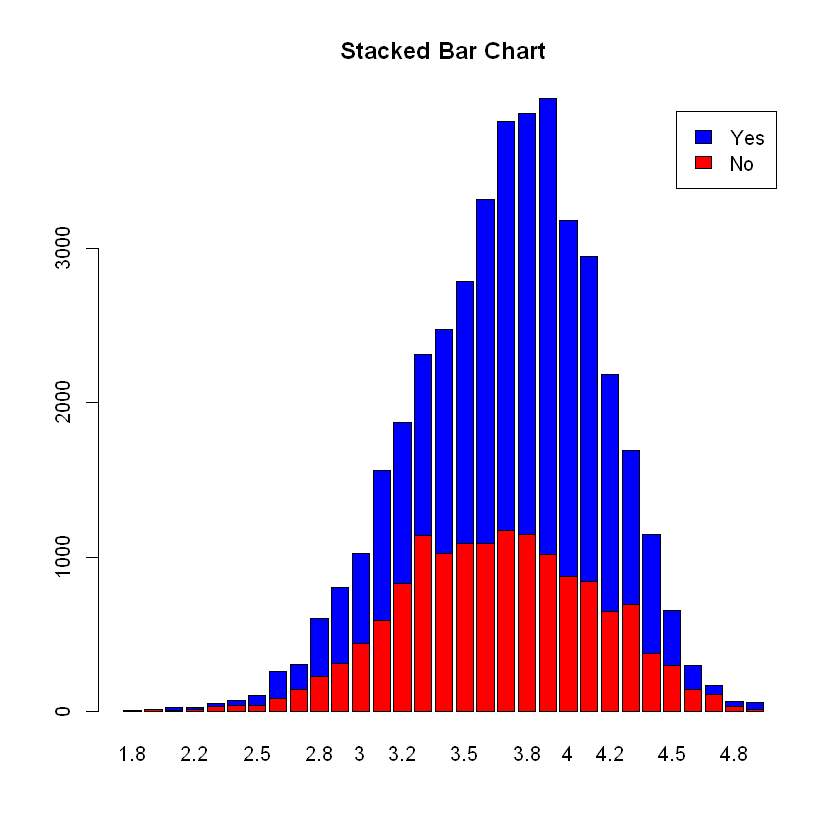

In [47]:
# Create a stacked bar chart
barplot(t(x_df) , legend.text = TRUE, col = c("red", "blue"), main = "Stacked Bar Chart" , 
        names.arg = row.names(x))

### Note : names.arg = row.names(x) 
## optional bcz in above code as row values are my index values , thats why no need to set it explicitly !

In [98]:
### use beside = TRUE to create grouped bar chart..

In [99]:
"

The t(df) transposes the data frame to ensure that the bars are stacked correctly..
U can set beside = TRUE to group the bars, ie grouped-bar chart

"

[1] "\nThe t(cross_tab_df) transposes the data frame to ensure that the bars are stacked correctly..\nWe set beside = TRUE to stack the bars,\n\n"

In [ ]:
"

This gives us some insights that these are couple of ratings for which we have interesting stats !
Now lets make this chart or lets make this insight much more clear !

So instead of focusing on count here(bar chart scale) , can we obtain proportions(in normalized barplot) ?

if u want to analyze proportions within each category in region , then 100% stacked bar-chart is useful !

"

In [ ]:
### lets make it as 100% stacked bar chart , so first Normalize the table by rows !

In [43]:
help(prop.table)

In [ ]:
"

prop.table(x, margin = NULL)


x : table

margin : a vector giving the margins to split by. 
         E.g., for a matrix ,  1 indicates rows, 
                               2 indicates columns 
                               c(1, 2) indicates rows and columns..

"

In [ ]:
## Syntax :: prop.table(x, margin = NULL)
## x receives data in the form of table or array , 
## This can be a one-dimensional, two-dimensional, or multi-dimensional table containing counts or frequencies.


In [48]:
class(x_df) ## as it is a dataframe , ie we can't directly pass x_Df to it , ie we need to convert it into array or matrix..

[1] "data.frame"

In [49]:
class(as.matrix(x_df))

[1] "matrix" "array"

In [50]:
normalize_x_df = prop.table(as.matrix(x_df) , margin = 1) * 100
## prop.table is a base-R command 

In [51]:
normalize_x_df

## For rating 2.1 , 37.5% of restaurants do not accept online bookings, while 62.5% of restaurants do accept online bookings..

## OR
## 37.5% of restaurants do not accept online bookings & they have rating as 2.1
## while 62.5% of restaurants do accept online bookings & they have rating as 2.1

,No,Yes
1.8,100.00000,0.00000
2,100.00000,0.00000
2.1,37.50000,62.50000
2.2,38.46154,61.53846
2.3,56.86275,43.13725
2.4,51.42857,48.57143
2.5,37.62376,62.37624
2.6,31.92308,68.07692
2.7,45.92834,54.07166
2.8,37.33333,62.66667


In [102]:
"
If u will pass x_df which is a dataframe to this prop.table()  , u will end up getting below error :

Error in marginSums(x, margin): 'x' is not an array

"

[1] "\nIf u will pass x_df which is a dataframe to this prop.table()  , u will end up getting below error :\n\nError in marginSums(x, margin): 'x' is not an array\n\n"

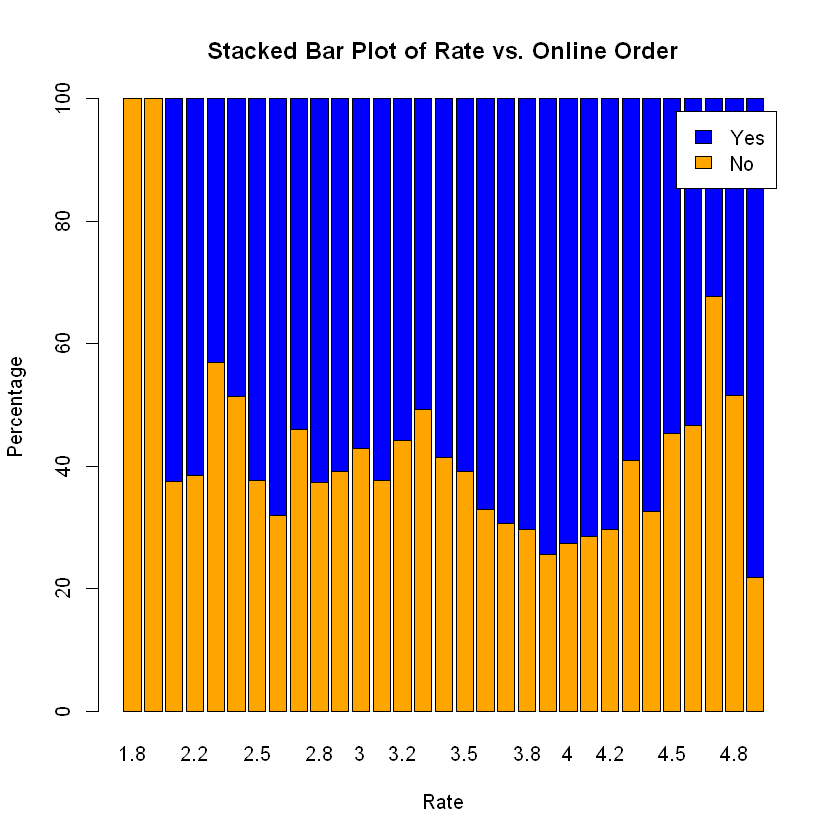

In [50]:
# Create a stacked bar plot
barplot(t(normalize_x_df), legend.text = TRUE,
        main = "Stacked Bar Plot of Rate vs. Online Order", xlab = "Rate",
        ylab = "Percentage" , col = c("orange", "blue"))


## legend.text = colnames(normalize_x_df)
## t(normalize_x)

In [ ]:
"
In order to be a highly rated restaurant , its a good thing to accept online Order at Zomato !
Look in 4.0 - 4.6 , most of the restaurants do accept online order !

"

## 4.. Data Cleaning to perform Text Analysis 
    Perform Text Analysis.. ie analysing customer reviews of Quick Bites restaurant : 

## ways to do it..

    a) using wordcloud
    
        But wordcloud will not give a clear cut , how important words are
        So lets use a concept of frequency over here...
        
    b) using plots/charts-- where each word have some frequency..

### b) using plots/charts
    We need Pre-processed data so that we can plot charts
    ie  (Biryani , 10K)
        (Chicken , 15K)
        etc..
        
        How to Perform Data Pre-processing to pre-process this data..
        Steps-->>
            a) Perform Lower-case operation
            b) Do tokenization
            c) Removal of stopwords from data
            d) Store your entire data in the character vector so that we can compute frequency of each word
            e) Do plotting , using Unigram  , bigram & Trigram analysis..

In [ ]:
### ie first we need whole data of 'Quick Bites' , but first & foremost lets make this feature 'rest_type' clean , ie 
## remove missing values in this feature if available ..

    is: This is a prefix commonly used in R for functions that perform logical tests or checks. 
        It's not a class , ie it is an indication that the function is checking a condition..

    na(): This is the function that checks for missing values (NA) in R. 
          It returns a logical vector indicating whether each element in a vector or data frame is missing or not.

In [ ]:
help(is.na)

## The generic function is.na indicates which elements are missing in vectors and data frames in R

## is.na(x)
## anyNA(x, recursive = FALSE)

In [52]:
class(is.na(df$rest_type))  ## returns a logical filter of False & True 

## where-ever TRUE , ie we have missing value for that instance 
## where-ever FALSE , ie we don't have missing value for that instance 

[1] "logical"

In [53]:
sum(is.na(df$rest_type))

### ie there are 227 missing rows in "rest_type" feature..

[1] 227

In [54]:
dim(df)

[1] 51717    18

In [ ]:
### lets skip all the missing values..

In [55]:
filter = is.na(df$rest_type) ## returns a logical filter of False & True 
data = df[!filter, ]    ## df[rows , cols]

In [56]:
dim(data)

[1] 51490    18

In [ ]:
### if we need whole data of 'Quick Bites' restaurant , we can use below code : 

In [57]:
unique(data$rest_type)

[1] "Casual Dining"                 "Cafe, Casual Dining"          
 [3] "Quick Bites"                   "Casual Dining, Cafe"          
 [5] "Cafe"                          "Quick Bites, Cafe"            
 [7] "Cafe, Quick Bites"             "Delivery"                     
 [9] "Mess"                          "Dessert Parlor"               
[11] "Bakery, Dessert Parlor"        "Pub"                          
[13] "Bakery"                        "Takeaway, Delivery"           
[15] "Fine Dining"                   "Beverage Shop"                
[17] "Sweet Shop"                    "Bar"                          
[19] "Beverage Shop, Quick Bites"    "Confectionery"                
[21] "Quick Bites, Beverage Shop"    "Dessert Parlor, Sweet Shop"   
[23] "Bakery, Quick Bites"           "Sweet Shop, Quick Bites"      
[25] "Kiosk"                         "Food Truck"                   
[27] "Quick Bites, Dessert Parlor"   "Beverage Shop, Dessert Parlor"
[29] "Takeaway"                      "Pub, Casual Dining"           
[31] "Casual Dining, Bar"            "Dessert Parlor, Beverage Shop"
[33] "Quick Bites, Bakery"           "Dessert Parlor, Quick Bites"  
[35] "Microbrewery, Casual Dining"   "Lounge"                       
[37] "Bar, Casual Dining"            "Food Court"                   
[39] "Cafe, Bakery"                  "Dhaba"                        
[41] "Quick Bites, Sweet Shop"       "Microbrewery"                 
[43] "Food Court, Quick Bites"       "Pub, Bar"                     
[45] "Casual Dining, Pub"            "Lounge, Bar"                  
[47] "Food Court, Dessert Parlor"    "Casual Dining, Sweet Shop"    
[49] "Food Court, Casual Dining"     "Casual Dining, Microbrewery"  
[51] "Sweet Shop, Dessert Parlor"    "Bakery, Beverage Shop"        
[53] "Lounge, Casual Dining"         "Cafe, Food Court"             
[55] "Beverage Shop, Cafe"           "Cafe, Dessert Parlor"         
[57] "Dessert Parlor, Cafe"          "Dessert Parlor, Bakery"       
[59] "Microbrewery, Pub"             "Bakery, Food Court"           
[61] "Club"                          "Quick Bites, Food Court"      
[63] "Bakery, Cafe"                  "Bar, Cafe"                    
[65] "Pub, Cafe"                     "Casual Dining, Irani Cafee"   
[67] "Fine Dining, Lounge"           "Bar, Quick Bites"             
[69] "Bakery, Kiosk"                 "Pub, Microbrewery"            
[71] "Microbrewery, Lounge"          "Fine Dining, Microbrewery"    
[73] "Fine Dining, Bar"              "Mess, Quick Bites"            
[75] "Dessert Parlor, Kiosk"         "Bhojanalya"                   
[77] "Casual Dining, Quick Bites"    "Pop Up"                       
[79] "Cafe, Bar"                     "Casual Dining, Lounge"        
[81] "Bakery, Sweet Shop"            "Microbrewery, Bar"            
[83] "Cafe, Lounge"                  "Bar, Pub"                     
[85] "Lounge, Cafe"                  "Club, Casual Dining"          
[87] "Quick Bites, Mess"             "Quick Bites, Meat Shop"       
[89] "Quick Bites, Kiosk"            "Lounge, Microbrewery"         
[91] "Food Court, Beverage Shop"     "Dessert Parlor, Food Court"   
[93] "Bar, Lounge"

In [ ]:
help(grepl)

## Pattern Matching and Replacement

In [ ]:
"

grepl(pattern, x, ignore.case = FALSE, perl = FALSE,
      fixed = FALSE, useBytes = FALSE)




pattern : The pattern or regular expression that you want to search within the character vector

x : The character vector in which you want to search for the pattern..

ignore.case : A logical value indicating whether to ignore the case when matching the pattern. 
              If TRUE, the matching is case-insensitive; if FALSE, it is case-sensitive.



"

In [58]:
args(grepl)

function (pattern, x, ignore.case = FALSE, perl = FALSE, fixed = FALSE, 
    useBytes = FALSE) 
NULL

In [ ]:
grepl('Quick Bites', data$rest_type)

## returns a logical vector (TRUE or FALSE)

In [59]:
quick_bites_df = data[grepl('Quick Bites', data$rest_type) , ] ## data[rows , cols]

## ie extract those rows , where we have "sub-string" as 'Quick Bites'
## as there are entries as : 'Quick Bites' , 'Quick Bites, Cafe', 'Quick Bites, Dessert Parlor' etc..

In [60]:
dim(quick_bites_df)

[1] 20639    18

#### a) Perform Lower-case operation

In [61]:
names(quick_bites_df)

[1] "index"                       "url"                        
 [3] "address"                     "name"                       
 [5] "online_order"                "book_table"                 
 [7] "rate"                        "votes"                      
 [9] "phone"                       "location"                   
[11] "rest_type"                   "dish_liked"                 
[13] "cuisines"                    "approx_cost.for.two.people."
[15] "reviews_list"                "menu_item"                  
[17] "listed_in.type."             "listed_in.city."

In [62]:
tolower(quick_bites_df$reviews_list[1])

[1] "[('rated 4.0', \"rated\\n  great food and proper karnataka style full meals. been there twice and was fully satisfied.. will give 5 stars if it's well managed............\"), ('rated 2.0', 'rated\\n  reached the place at 3pm on saturday. half of the items on the menu were over. what was annoying was is the food was cold. the taste was also very average. only dosa and holige were good. there were very few people in the restaurant and the service was still very slow. the waiters were all standing in one corner and talking. had to call them repeatedly.'), ('rated 4.0', 'rated\\n  had been here, good food served and tasty,good place to go with freinds and family, should be first to get served well with all food. one of the good hotel there for this price.'), ('rated 2.0', 'rated\\n  how can a udupi restaurant be so dirty.the floor the walls the waiters are all stained in food.why cant they clean it? the floor even had decorative colour paper every where and lot of food.now coming to the taste of the food- it was pretty decent for what they chargw.what upset us was the menu says they serve thambuli, two variety of rice etc but they were all over at 2.45 but they still charged us full amount.lastly if u r ok to b seated with random people and adjust with their table manners( burrping etc) then tis place is decent for a quick veg udupi meals'), ('rated 4.0', 'rated\\n  aadhuri udupi bhojana is one of the best vegetarian hotel in and around banashankari locality\\nwere we can enjoy the authentic south karnataka style food.'), ('rated 5.0', 'rated\\n  one of the best restaurants for unlimited food. price for one full unlimited meal is ?150 and the service is awesome here. if youã<U+0083>\\x83ã<U+0082>\\x83ã<U+0083>\\x82ã<U+0082>\\x82ã<U+0083>\\x83ã<U+0082>\\x82ã<U+0083>\\x82ã<U+0082>\\x92re a costalian you will love the food served here.'), ('rated 4.0', \"rated\\n  been here a couple of times. highly satisfying on both the ocassions. great food. decent service. at price of 160 per person it is of a great value. the staff here serves in a traditional mysore style dresses. the food is authentic karnataka meals. i really liked the pineapple pickle/chutney. they serve some 4 varities of rice of which you shouldn't try all as you would already be full. roti, dosa were decent. in the deserts, payasam& holige were good.\\ni think it is one the must try places to try some authentic south food even if you have been to the likes of kamath etc. this one is a little different. :)\"), ('rated 5.0', 'rated\\n  very good restorent good south indian food very nice all food s are good we spent good time and food in this hotel value of money we loved it'), ('rated 3.5', 'rated\\n  i went to this restaurant on sunday afternoon.it was a bit crowded.\\n\\nits located in the 1st floor above anna kuteera kathriguppe\\n\\nyou need to take food coupon in the ground floor itself.\\nit was 160 rs.\\n\\ntaste wise it was good.\\nservice was slow.\\nnothing exciting/different in the menu.\\nwhatever they serve its good.\\nworth for money.'), ('rated 5.0', 'rated\\n  awesome place , worth with price , quality , quantity , service , hygiene and discipline i loved it ???? wish there were more rating stars to give i give 100 on 5 for sure'), ('rated 3.5', 'rated\\n  nice food, good ambiance, so many verity of food, this time i was in hurry so, next review will be detailed one. its good to see all dishes at one place'), ('rated 1.5', 'rated\\n  the food was not satisfactory. not one item served could be eaten again . only advantage is the price but even that is not going to be enough to make me visit the place again . dear udupi staff people wouldnã<U+0083>\\x83ã<U+0082>\\x83ã<U+0083>\\x82ã<U+0082>\\x82ã<U+0083>\\x83ã<U+0082>\\x82ã<U+0083>\\x82ã<U+0082>\\x92t mind if the food quality was better for a higher price and please get more fans so that people wonã<U+0083>\\x83ã<U+0082>\\x83ã<U+0083>\\x82ã<U+0082>\\x82ã<U+0083>\\x83ã<U+0082>\\x82ã<U+0083>\\x82ã<U+0082>\\

In [ ]:
## if we will print "quick_bites_df['reviews_list']" ,it will take 10MB just to print it , notebook size will get inc by 10 MB

In [ ]:
### there will be some reviews written by user in which they have used lower-case "biryani" instead of Title-case "Biryani"..
### but technically both are same , so lets make both on same scale ..

In [65]:
help(tolower)

### Translate characters in character vectors, in particular from upper to lower case

In [ ]:
"

tolower(x)

x : a character vector

"

In [63]:
args(tolower)

function (x) 
NULL

In [63]:
quick_bites_df$reviews_list = tolower(quick_bites_df$reviews_list) 

## takes 1 min for quick_bites_df in NEW PC 

## takes 1 min for quick_bites_df in OlD PC 
### tolower() function to convert all text in reviews_list column to lowercase..

#### b) Do tokenization

In [64]:
library(stringr)

In [65]:
quick_bites_df$reviews_list[1]

[1] "[('rated 4.0', \"rated\\n  great food and proper karnataka style full meals. been there twice and was fully satisfied.. will give 5 stars if it's well managed............\"), ('rated 2.0', 'rated\\n  reached the place at 3pm on saturday. half of the items on the menu were over. what was annoying was is the food was cold. the taste was also very average. only dosa and holige were good. there were very few people in the restaurant and the service was still very slow. the waiters were all standing in one corner and talking. had to call them repeatedly.'), ('rated 4.0', 'rated\\n  had been here, good food served and tasty,good place to go with freinds and family, should be first to get served well with all food. one of the good hotel there for this price.'), ('rated 2.0', 'rated\\n  how can a udupi restaurant be so dirty.the floor the walls the waiters are all stained in food.why cant they clean it? the floor even had decorative colour paper every where and lot of food.now coming to the taste of the food- it was pretty decent for what they chargw.what upset us was the menu says they serve thambuli, two variety of rice etc but they were all over at 2.45 but they still charged us full amount.lastly if u r ok to b seated with random people and adjust with their table manners( burrping etc) then tis place is decent for a quick veg udupi meals'), ('rated 4.0', 'rated\\n  aadhuri udupi bhojana is one of the best vegetarian hotel in and around banashankari locality\\nwere we can enjoy the authentic south karnataka style food.'), ('rated 5.0', 'rated\\n  one of the best restaurants for unlimited food. price for one full unlimited meal is ?150 and the service is awesome here. if youã<U+0083>\\x83ã<U+0082>\\x83ã<U+0083>\\x82ã<U+0082>\\x82ã<U+0083>\\x83ã<U+0082>\\x82ã<U+0083>\\x82ã<U+0082>\\x92re a costalian you will love the food served here.'), ('rated 4.0', \"rated\\n  been here a couple of times. highly satisfying on both the ocassions. great food. decent service. at price of 160 per person it is of a great value. the staff here serves in a traditional mysore style dresses. the food is authentic karnataka meals. i really liked the pineapple pickle/chutney. they serve some 4 varities of rice of which you shouldn't try all as you would already be full. roti, dosa were decent. in the deserts, payasam& holige were good.\\ni think it is one the must try places to try some authentic south food even if you have been to the likes of kamath etc. this one is a little different. :)\"), ('rated 5.0', 'rated\\n  very good restorent good south indian food very nice all food s are good we spent good time and food in this hotel value of money we loved it'), ('rated 3.5', 'rated\\n  i went to this restaurant on sunday afternoon.it was a bit crowded.\\n\\nits located in the 1st floor above anna kuteera kathriguppe\\n\\nyou need to take food coupon in the ground floor itself.\\nit was 160 rs.\\n\\ntaste wise it was good.\\nservice was slow.\\nnothing exciting/different in the menu.\\nwhatever they serve its good.\\nworth for money.'), ('rated 5.0', 'rated\\n  awesome place , worth with price , quality , quantity , service , hygiene and discipline i loved it ???? wish there were more rating stars to give i give 100 on 5 for sure'), ('rated 3.5', 'rated\\n  nice food, good ambiance, so many verity of food, this time i was in hurry so, next review will be detailed one. its good to see all dishes at one place'), ('rated 1.5', 'rated\\n  the food was not satisfactory. not one item served could be eaten again . only advantage is the price but even that is not going to be enough to make me visit the place again . dear udupi staff people wouldnã<U+0083>\\x83ã<U+0082>\\x83ã<U+0083>\\x82ã<U+0082>\\x82ã<U+0083>\\x83ã<U+0082>\\x82ã<U+0083>\\x82ã<U+0082>\\x92t mind if the food quality was better for a higher price and please get more fans so that people wonã<U+0083>\\x83ã<U+0082>\\x83ã<U+0083>\\x82ã<U+0082>\\x82ã<U+0083>\\x83ã<U+0082>\\x82ã<U+0083>\\x82ã<U+0082>\\

In [66]:
text_to_tokenize = as.character(quick_bites_df$reviews_list[1])

### make sure it should belong to character data-type (often known as string) if u want to perform string operations...

In [59]:
pattern = "[a-zA-Z]+"

In [ ]:
"

"[a-zA-Z]+": This is a regular expression pattern. 
             It specifies that you want to extract one or more (+) alphabetical characters ([a-zA-Z]) & skip others..
             "+" is a quantifier which means I want one or more occurences of this pattern [a-zA-Z]
             This pattern will match any sequence of alphabets..


"

In [80]:
help(str_extract_all)

## belongs to stringr package !
## str_extract() extracts the first complete match from each string, str_extract_all() extracts all matches from each string..

In [ ]:
"
str_extract_all(string, pattern, simplify = FALSE)


string : The input text from which you want to extract substrings.
pattern : The regular expression pattern to match for extracting substrings. 
          
simplify : This parameter controls the structure of the output. 
            If set to TRUE, the result will be simplified into a matrix or vector if possible, 
            otherwise, it'll return a list.


"

In [67]:
args(str_extract_all)

function (string, pattern, simplify = FALSE) 
NULL

In [68]:
stringr :: str_extract_all(text_to_tokenize, "[a-zA-Z]+")[[1]]

## unlist(stringr :: str_extract_all(text_to_tokenize, "[a-zA-Z]+"))

[1] "rated"             "rated"             "n"                
   [4] "great"             "food"              "and"              
   [7] "proper"            "karnataka"         "style"            
  [10] "full"              "meals"             "been"             
  [13] "there"             "twice"             "and"              
  [16] "was"               "fully"             "satisfied"        
  [19] "will"              "give"              "stars"            
  [22] "if"                "it"                "s"                
  [25] "well"              "managed"           "rated"            
  [28] "rated"             "n"                 "reached"          
  [31] "the"               "place"             "at"               
  [34] "pm"                "on"                "saturday"         
  [37] "half"              "of"                "the"              
  [40] "items"             "on"                "the"              
  [43] "menu"              "were"              "over"             
  [46] "what"              "was"               "annoying"         
  [49] "was"               "is"                "the"              
  [52] "food"              "was"               "cold"             
  [55] "the"               "taste"             "was"              
  [58] "also"              "very"              "average"          
  [61] "only"              "dosa"              "and"              
  [64] "holige"            "were"              "good"             
  [67] "there"             "were"              "very"             
  [70] "few"               "people"            "in"               
  [73] "the"               "restaurant"        "and"              
  [76] "the"               "service"           "was"              
  [79] "still"             "very"              "slow"             
  [82] "the"               "waiters"           "were"             
  [85] "all"               "standing"          "in"               
  [88] "one"               "corner"            "and"              
  [91] "talking"           "had"               "to"               
  [94] "call"              "them"              "repeatedly"       
  [97] "rated"             "rated"             "n"                
 [100] "had"               "been"              "here"             
 [103] "good"              "food"              "served"           
 [106] "and"               "tasty"             "good"             
 [109] "place"             "to"                "go"               
 [112] "with"              "freinds"           "and"              
 [115] "family"            "should"            "be"               
 [118] "first"             "to"                "get"              
 [121] "served"            "well"              "with"             
 [124] "all"               "food"              "one"              
 [127] "of"                "the"               "good"             
 [130] "hotel"             "there"             "for"              
 [133] "this"              "price"             "rated"            
 [136] "rated"             "n"                 "how"              
 [139] "can"               "a"                 "udupi"            
 [142] "restaurant"        "be"                "so"               
 [145] "dirty"             "the"               "floor"            
 [148] "the"               "walls"             "the"              
 [151] "waiters"           "are"               "all"              
 [154] "stained"           "in"                "food"             
 [157] "why"               "cant"              "they"             
 [160] "clean"             "it"                "the"              
 [163] "floor"             "even"              "had"              
 [166] "decorative"        "colour"            "paper"            
 [169] "every"             "where"             "and"              
 [172] "lot"               "of"                "food"             
 [175] "now"               "coming"            "to"               
 [178] "the"               "taste"             "of

In [69]:
words_tokens_clean = stringr :: str_extract_all(text_to_tokenize, "[a-zA-Z]+")[[1]]

### str_extract_all() : It is used to extract all occurrences of a pattern in a string..

In [ ]:
"

text_to_tokenize: This is the input text that you want to tokenize.

"[a-zA-Z]+": This is a regular expression pattern. 
             It specifies that you want to extract one or more (+) alphabetical characters ([a-zA-Z]) & skip others..
             "+" is a quantifier which means I want one or more occurences of this pattern [a-zA-Z]
             This pattern will match any sequence of alphabets..



So, in summary, this code extracts all words (sequences of alphabetical characters) from the text_to_tokenize variable in R.
The result is a vector of words..


"

In [70]:
words_tokens_clean

[1] "rated"             "rated"             "n"                
   [4] "great"             "food"              "and"              
   [7] "proper"            "karnataka"         "style"            
  [10] "full"              "meals"             "been"             
  [13] "there"             "twice"             "and"              
  [16] "was"               "fully"             "satisfied"        
  [19] "will"              "give"              "stars"            
  [22] "if"                "it"                "s"                
  [25] "well"              "managed"           "rated"            
  [28] "rated"             "n"                 "reached"          
  [31] "the"               "place"             "at"               
  [34] "pm"                "on"                "saturday"         
  [37] "half"              "of"                "the"              
  [40] "items"             "on"                "the"              
  [43] "menu"              "were"              "over"             
  [46] "what"              "was"               "annoying"         
  [49] "was"               "is"                "the"              
  [52] "food"              "was"               "cold"             
  [55] "the"               "taste"             "was"              
  [58] "also"              "very"              "average"          
  [61] "only"              "dosa"              "and"              
  [64] "holige"            "were"              "good"             
  [67] "there"             "were"              "very"             
  [70] "few"               "people"            "in"               
  [73] "the"               "restaurant"        "and"              
  [76] "the"               "service"           "was"              
  [79] "still"             "very"              "slow"             
  [82] "the"               "waiters"           "were"             
  [85] "all"               "standing"          "in"               
  [88] "one"               "corner"            "and"              
  [91] "talking"           "had"               "to"               
  [94] "call"              "them"              "repeatedly"       
  [97] "rated"             "rated"             "n"                
 [100] "had"               "been"              "here"             
 [103] "good"              "food"              "served"           
 [106] "and"               "tasty"             "good"             
 [109] "place"             "to"                "go"               
 [112] "with"              "freinds"           "and"              
 [115] "family"            "should"            "be"               
 [118] "first"             "to"                "get"              
 [121] "served"            "well"              "with"             
 [124] "all"               "food"              "one"              
 [127] "of"                "the"               "good"             
 [130] "hotel"             "there"             "for"              
 [133] "this"              "price"             "rated"            
 [136] "rated"             "n"                 "how"              
 [139] "can"               "a"                 "udupi"            
 [142] "restaurant"        "be"                "so"               
 [145] "dirty"             "the"               "floor"            
 [148] "the"               "walls"             "the"              
 [151] "waiters"           "are"               "all"              
 [154] "stained"           "in"                "food"             
 [157] "why"               "cant"              "they"             
 [160] "clean"             "it"                "the"              
 [163] "floor"             "even"              "had"              
 [166] "decorative"        "colour"            "paper"            
 [169] "every"             "where"             "and"              
 [172] "lot"               "of"                "food"             
 [175] "now"               "coming"            "to"               
 [178] "the"               "taste"             "of

In [71]:
class(words_tokens_clean) ## ie its a character vector 

[1] "character"

In [ ]:
### so lets define a function so that I am able to tokenize every row using regular expression ! 

In [72]:
library(stringr)

In [73]:

tokenize_text = function(text) 
{
  stringr :: str_extract_all(text, "[a-zA-Z]+")[[1]]
}


In [ ]:
### now I have to apply above tokenize_text function on top of 'reviews_list' feature..
## as we have already used apply() to apply a custom function , 
## this time , lets use lapply() function 

In [ ]:
help(lapply)

## Apply a Function over a List or Vector

In [ ]:
## Syntax: lapply( x , fun )
## lapply() basically returns O/P as : list
## The lapply() takes a list, vector, or data frame as input and gives output in the form of a list object

In [74]:
args(lapply)

function (X, FUN, ...) 
NULL

In [75]:
lapply(quick_bites_df$reviews_list[1] ,  tokenize_text)

## Syntax: lapply( x , fun )
## lapply() basically returns O/P as : list
## The lapply() takes a list, vector, or data frame as input and gives output in the form of a list object


## Note : Its good to unlist o/p generated by function , otherwise u will end up getting 1. A. (ie nested list output)

[[1]]
   [1] "rated"             "rated"             "n"                
   [4] "great"             "food"              "and"              
   [7] "proper"            "karnataka"         "style"            
  [10] "full"              "meals"             "been"             
  [13] "there"             "twice"             "and"              
  [16] "was"               "fully"             "satisfied"        
  [19] "will"              "give"              "stars"            
  [22] "if"                "it"                "s"                
  [25] "well"              "managed"           "rated"            
  [28] "rated"             "n"                 "reached"          
  [31] "the"               "place"             "at"               
  [34] "pm"                "on"                "saturday"         
  [37] "half"              "of"                "the"              
  [40] "items"             "on"                "the"              
  [43] "menu"              "were"              "over"             
  [46] "what"              "was"               "annoying"         
  [49] "was"               "is"                "the"              
  [52] "food"              "was"               "cold"             
  [55] "the"               "taste"             "was"              
  [58] "also"              "very"              "average"          
  [61] "only"              "dosa"              "and"              
  [64] "holige"            "were"              "good"             
  [67] "there"             "were"              "very"             
  [70] "few"               "people"            "in"               
  [73] "the"               "restaurant"        "and"              
  [76] "the"               "service"           "was"              
  [79] "still"             "very"              "slow"             
  [82] "the"               "waiters"           "were"             
  [85] "all"               "standing"          "in"               
  [88] "one"               "corner"            "and"              
  [91] "talking"           "had"               "to"               
  [94] "call"              "them"              "repeatedly"       
  [97] "rated"             "rated"             "n"                
 [100] "had"               "been"              "here"             
 [103] "good"              "food"              "served"           
 [106] "and"               "tasty"             "good"             
 [109] "place"             "to"                "go"               
 [112] "with"              "freinds"           "and"              
 [115] "family"            "should"            "be"               
 [118] "first"             "to"                "get"              
 [121] "served"            "well"              "with"             
 [124] "all"               "food"              "one"              
 [127] "of"                "the"               "good"             
 [130] "hotel"             "there"             "for"              
 [133] "this"              "price"             "rated"            
 [136] "rated"             "n"                 "how"              
 [139] "can"               "a"                 "udupi"            
 [142] "restaurant"        "be"                "so"               
 [145] "dirty"             "the"               "floor"            
 [148] "the"               "walls"             "the"              
 [151] "waiters"           "are"               "all"              
 [154] "stained"           "in"                "food"             
 [157] "why"               "cant"              "they"             
 [160] "clean"             "it"                "the"              
 [163] "floor"             "even"              "had"              
 [166] "decorative"        "colour"            "paper"            
 [169] "every"             "where"             "and"              
 [172] "lot"               "of"                "food"             
 [175] "now"               "coming"            "to"               
 [178] "the"               "taste"       

In [76]:
class(lapply(quick_bites_df$reviews_list[1] ,  tokenize_text))

[1] "list"

In [ ]:
"

Note : If u will str_extract_all , u will end up properly structured data ie as :
        'rated' , 'rated' , 'n' , 'great' , 'food' , ------

        If u will use strsplit + grepl , u will end up properly un-structured data ie as :
        '[(\'rated' , '''rated\\n' , 'n' , 'great' , 'food' , ------

"

In [77]:
unlist(lapply(quick_bites_df$reviews_list[1] ,  tokenize_text))

[1] "rated"             "rated"             "n"                
   [4] "great"             "food"              "and"              
   [7] "proper"            "karnataka"         "style"            
  [10] "full"              "meals"             "been"             
  [13] "there"             "twice"             "and"              
  [16] "was"               "fully"             "satisfied"        
  [19] "will"              "give"              "stars"            
  [22] "if"                "it"                "s"                
  [25] "well"              "managed"           "rated"            
  [28] "rated"             "n"                 "reached"          
  [31] "the"               "place"             "at"               
  [34] "pm"                "on"                "saturday"         
  [37] "half"              "of"                "the"              
  [40] "items"             "on"                "the"              
  [43] "menu"              "were"              "over"             
  [46] "what"              "was"               "annoying"         
  [49] "was"               "is"                "the"              
  [52] "food"              "was"               "cold"             
  [55] "the"               "taste"             "was"              
  [58] "also"              "very"              "average"          
  [61] "only"              "dosa"              "and"              
  [64] "holige"            "were"              "good"             
  [67] "there"             "were"              "very"             
  [70] "few"               "people"            "in"               
  [73] "the"               "restaurant"        "and"              
  [76] "the"               "service"           "was"              
  [79] "still"             "very"              "slow"             
  [82] "the"               "waiters"           "were"             
  [85] "all"               "standing"          "in"               
  [88] "one"               "corner"            "and"              
  [91] "talking"           "had"               "to"               
  [94] "call"              "them"              "repeatedly"       
  [97] "rated"             "rated"             "n"                
 [100] "had"               "been"              "here"             
 [103] "good"              "food"              "served"           
 [106] "and"               "tasty"             "good"             
 [109] "place"             "to"                "go"               
 [112] "with"              "freinds"           "and"              
 [115] "family"            "should"            "be"               
 [118] "first"             "to"                "get"              
 [121] "served"            "well"              "with"             
 [124] "all"               "food"              "one"              
 [127] "of"                "the"               "good"             
 [130] "hotel"             "there"             "for"              
 [133] "this"              "price"             "rated"            
 [136] "rated"             "n"                 "how"              
 [139] "can"               "a"                 "udupi"            
 [142] "restaurant"        "be"                "so"               
 [145] "dirty"             "the"               "floor"            
 [148] "the"               "walls"             "the"              
 [151] "waiters"           "are"               "all"              
 [154] "stained"           "in"                "food"             
 [157] "why"               "cant"              "they"             
 [160] "clean"             "it"                "the"              
 [163] "floor"             "even"              "had"              
 [166] "decorative"        "colour"            "paper"            
 [169] "every"             "where"             "and"              
 [172] "lot"               "of"                "food"             
 [175] "now"               "coming"            "to"               
 [178] "the"               "taste"             "of

In [78]:
dim(quick_bites_df)

[1] 20639    18

In [79]:
### u can consider some sample if u don't have good specifications in your system !
sample = quick_bites_df[0 : 10000 , ]

In [80]:
# Apply the tokenization function to every row of 'reviews_list' column using lapply()
# this lapply() will return better structured data as per our need !

## takes 1-3 sec in NEW PC !

start_time = Sys.time()
sample$reviews_tokens =  lapply(sample$reviews_list ,  tokenize_text)

end_time = Sys.time()
print(end_time - start_time)

Time difference of 3.009694 secs


In [81]:
class(sample$reviews_tokens)

[1] "list"

In [ ]:
## NEW PC :

## takes 1-2 sec for 5K sample of quick_bites_df 
## takes 3-4 sec for 10K sample of quick_bites_df 
## takes 9-10 sec for 20k sample of quick_bites_df 

In [37]:
# Apply the tokenization function to the 'reviews_list' column


## OLD PC : 
## takes 5-6 mins for 10K sample of data dataframe

## takes 1-2 mins for 10K sample of quick_bites_df
## takes 3-4 sec for 10K sample of quick_bites_df
## takes 20 sec hardly for 1K sample of quick_bites_df

In [82]:
names(sample)

[1] "index"                       "url"                        
 [3] "address"                     "name"                       
 [5] "online_order"                "book_table"                 
 [7] "rate"                        "votes"                      
 [9] "phone"                       "location"                   
[11] "rest_type"                   "dish_liked"                 
[13] "cuisines"                    "approx_cost.for.two.people."
[15] "reviews_list"                "menu_item"                  
[17] "listed_in.type."             "listed_in.city."            
[19] "reviews_tokens"

In [83]:
dim(sample)

[1] 10000    19

## 5.. Performing Unigram analysis & removal of stopwords ..

In [ ]:
## do not print sample$reviews_tokens , otherwise it will take enough time to execute it... (5 mins still executing)

In [84]:
sample$reviews_tokens[1]

[[1]]
   [1] "rated"             "rated"             "n"                
   [4] "great"             "food"              "and"              
   [7] "proper"            "karnataka"         "style"            
  [10] "full"              "meals"             "been"             
  [13] "there"             "twice"             "and"              
  [16] "was"               "fully"             "satisfied"        
  [19] "will"              "give"              "stars"            
  [22] "if"                "it"                "s"                
  [25] "well"              "managed"           "rated"            
  [28] "rated"             "n"                 "reached"          
  [31] "the"               "place"             "at"               
  [34] "pm"                "on"                "saturday"         
  [37] "half"              "of"                "the"              
  [40] "items"             "on"                "the"              
  [43] "menu"              "were"              "over"             
  [46] "what"              "was"               "annoying"         
  [49] "was"               "is"                "the"              
  [52] "food"              "was"               "cold"             
  [55] "the"               "taste"             "was"              
  [58] "also"              "very"              "average"          
  [61] "only"              "dosa"              "and"              
  [64] "holige"            "were"              "good"             
  [67] "there"             "were"              "very"             
  [70] "few"               "people"            "in"               
  [73] "the"               "restaurant"        "and"              
  [76] "the"               "service"           "was"              
  [79] "still"             "very"              "slow"             
  [82] "the"               "waiters"           "were"             
  [85] "all"               "standing"          "in"               
  [88] "one"               "corner"            "and"              
  [91] "talking"           "had"               "to"               
  [94] "call"              "them"              "repeatedly"       
  [97] "rated"             "rated"             "n"                
 [100] "had"               "been"              "here"             
 [103] "good"              "food"              "served"           
 [106] "and"               "tasty"             "good"             
 [109] "place"             "to"                "go"               
 [112] "with"              "freinds"           "and"              
 [115] "family"            "should"            "be"               
 [118] "first"             "to"                "get"              
 [121] "served"            "well"              "with"             
 [124] "all"               "food"              "one"              
 [127] "of"                "the"               "good"             
 [130] "hotel"             "there"             "for"              
 [133] "this"              "price"             "rated"            
 [136] "rated"             "n"                 "how"              
 [139] "can"               "a"                 "udupi"            
 [142] "restaurant"        "be"                "so"               
 [145] "dirty"             "the"               "floor"            
 [148] "the"               "walls"             "the"              
 [151] "waiters"           "are"               "all"              
 [154] "stained"           "in"                "food"             
 [157] "why"               "cant"              "they"             
 [160] "clean"             "it"                "the"              
 [163] "floor"             "even"              "had"              
 [166] "decorative"        "colour"            "paper"            
 [169] "every"             "where"             "and"              
 [172] "lot"               "of"                "food"             
 [175] "now"               "coming"            "to"               
 [178] "the"               "taste"       

In [ ]:
## if u have extracted "reviews_tokens" using apply() instead of lapply() 
## unlist(sample$reviews_tokens[1]) gives improper results !
## u have to use : sample$reviews_tokens[1]$`4`

#### c) Removal of stopwords from data

In [ ]:
## install.packages("tm") ## text-mining 

In [86]:
library(tm)

## execute twice..

In [87]:
stop = tm :: stopwords("en") ## getting all the stopwords which are defined by R developers in stopwords() of tm package..

In [88]:
stop

[1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "i'm"        "you're"     "he's"      
 [61] "she's"      "it's"       "we're"      "they're"    "i've"      
 [66] "you've"     "we've"      "they've"    "i'd"        "you'd"     
 [71] "he'd"       "she'd"      "we'd"       "they'd"     "i'll"      
 [76] "you'll"     "he'll"      "she'll"     "we'll"      "they'll"   
 [81] "isn't"      "aren't"     "wasn't"     "weren't"    "hasn't"    
 [86] "haven't"    "hadn't"     "doesn't"    "don't"      "didn't"    
 [91] "won't"      "wouldn't"   "shan't"     "shouldn't"  "can't"     
 [96] "cannot"     "couldn't"   "mustn't"    "let's"      "that's"    
[101] "who's"      "what's"     "here's"     "there's"    "when's"    
[106] "where's"    "why's"      "how's"      "a"          "an"        
[111] "the"        "and"        "but"        "if"         "or"        
[116] "because"    "as"         "until"      "while"      "of"        
[121] "at"         "by"         "for"        "with"       "about"     
[126] "against"    "between"    "into"       "through"    "during"    
[131] "before"     "after"      "above"      "below"      "to"        
[136] "from"       "up"         "down"       "in"         "out"       
[141] "on"         "off"        "over"       "under"      "again"     
[146] "further"    "then"       "once"       "here"       "there"     
[151] "when"       "where"      "why"        "how"        "all"       
[156] "any"        "both"       "each"       "few"        "more"      
[161] "most"       "other"      "some"       "such"       "no"        
[166] "nor"        "not"        "only"       "own"        "same"      
[171] "so"         "than"       "too"        "very"

In [89]:
length(stop) ## ie there are total 174 stopwords which are defined by R developers

[1] 174

In [ ]:
### Imagine we have find out some more stopwords in my data, then we can add it to my stop vector

In [90]:
# Define custom stopwords to add
custom_stopwords = c("rated" , "n" , "nan" , "x" , "RATED" , "Rated" , "can" , "will" , "one" , "also" , "t" , "s" )

In [104]:
help(union)

## perform Set Operations on two vectors !

In [ ]:
"

union(x , y)

x : This is first set on which u want to apply union operation..

y : This is the other set which should be union with the first set..

... : Additional arguments that can be passed..


"

In [102]:
args(union)

### x, y : Pair of compatible data frames.

function (x, y) 
NULL

In [91]:
# Combine the default stopwords and custom stopwords
all_stopwords = union(stop , custom_stopwords)

In [92]:
length(all_stopwords)

[1] 186

In [93]:
class(stop) ## ie its a character vector !

[1] "character"

In [ ]:
### very first let me show u how u can remove stopwords from 1 row , once u will understand it , u can apply this idea to col

In [94]:
text = sample$reviews_tokens[1]

In [95]:
text

[[1]]
   [1] "rated"             "rated"             "n"                
   [4] "great"             "food"              "and"              
   [7] "proper"            "karnataka"         "style"            
  [10] "full"              "meals"             "been"             
  [13] "there"             "twice"             "and"              
  [16] "was"               "fully"             "satisfied"        
  [19] "will"              "give"              "stars"            
  [22] "if"                "it"                "s"                
  [25] "well"              "managed"           "rated"            
  [28] "rated"             "n"                 "reached"          
  [31] "the"               "place"             "at"               
  [34] "pm"                "on"                "saturday"         
  [37] "half"              "of"                "the"              
  [40] "items"             "on"                "the"              
  [43] "menu"              "were"              "over"             
  [46] "what"              "was"               "annoying"         
  [49] "was"               "is"                "the"              
  [52] "food"              "was"               "cold"             
  [55] "the"               "taste"             "was"              
  [58] "also"              "very"              "average"          
  [61] "only"              "dosa"              "and"              
  [64] "holige"            "were"              "good"             
  [67] "there"             "were"              "very"             
  [70] "few"               "people"            "in"               
  [73] "the"               "restaurant"        "and"              
  [76] "the"               "service"           "was"              
  [79] "still"             "very"              "slow"             
  [82] "the"               "waiters"           "were"             
  [85] "all"               "standing"          "in"               
  [88] "one"               "corner"            "and"              
  [91] "talking"           "had"               "to"               
  [94] "call"              "them"              "repeatedly"       
  [97] "rated"             "rated"             "n"                
 [100] "had"               "been"              "here"             
 [103] "good"              "food"              "served"           
 [106] "and"               "tasty"             "good"             
 [109] "place"             "to"                "go"               
 [112] "with"              "freinds"           "and"              
 [115] "family"            "should"            "be"               
 [118] "first"             "to"                "get"              
 [121] "served"            "well"              "with"             
 [124] "all"               "food"              "one"              
 [127] "of"                "the"               "good"             
 [130] "hotel"             "there"             "for"              
 [133] "this"              "price"             "rated"            
 [136] "rated"             "n"                 "how"              
 [139] "can"               "a"                 "udupi"            
 [142] "restaurant"        "be"                "so"               
 [145] "dirty"             "the"               "floor"            
 [148] "the"               "walls"             "the"              
 [151] "waiters"           "are"               "all"              
 [154] "stained"           "in"                "food"             
 [157] "why"               "cant"              "they"             
 [160] "clean"             "it"                "the"              
 [163] "floor"             "even"              "had"              
 [166] "decorative"        "colour"            "paper"            
 [169] "every"             "where"             "and"              
 [172] "lot"               "of"                "food"             
 [175] "now"               "coming"            "to"               
 [178] "the"               "taste"       

In [96]:
class(text)

[1] "list"

In [97]:
class(unlist(text))

[1] "character"

In [ ]:
### why unlist(text) , bcz first we have to make sure that
## both text & stop must be a vector ie both should be on a same scale so that we can perform operation like removal of stopwords

In [98]:
unlist(text) %in% all_stopwords

### "%in% operator" check whether each elements of 1st vector[unlist(text)] is present in 2nd vector[all_stopwords] or not !
### It returns logical vector , where-ever we have TRUE , ie at that index we have a STOPWORD 

[1]  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE
  [13]  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE
  [25] FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE
  [37] FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE
  [49]  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE
  [61]  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
  [73]  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE
  [85]  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE
  [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE
 [109] FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE
 [121] FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE
 [133]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE
 [145] FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE
 [157]  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE
 [169] FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE
 [181]  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE
 [193] FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE
 [205] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE
 [229] FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
 [241]  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE
 [253] FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE
 [265] FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
 [277]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE
 [289]  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE
 [301]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
 [313] FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
 [325]  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE
 [337] FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
 [349] FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE
 [361]  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE
 [373] FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE
 [385] FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE
 [397]  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE
 [409]  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE
 [421]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE
 [433]  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE
 [457]  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE
 [469]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE
 [481]  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE
 [493] FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE
 [505] FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE
 [517]  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE
 [529] FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE
 [541] FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE
 [553]  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE
 [565]  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE
 [577]  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE
 [589] FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
 [601] FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALS

In [99]:
class(all_stopwords) ## ie a character vector 

[1] "character"

In [ ]:
## unlist(text)[unlist(text) %in% all_stopwords] 
## returns all stopwords !

## But since I want to skip all the stopwords , I can use negation of the above condition..

In [100]:
unlist(text)[!unlist(text) %in% all_stopwords]

### why unlist(text) , bcz first we have to make sure that
### both text & stop must be a vector so that we can remove stopwords

[1] "great"             "food"              "proper"           
   [4] "karnataka"         "style"             "full"             
   [7] "meals"             "twice"             "fully"            
  [10] "satisfied"         "give"              "stars"            
  [13] "well"              "managed"           "reached"          
  [16] "place"             "pm"                "saturday"         
  [19] "half"              "items"             "menu"             
  [22] "annoying"          "food"              "cold"             
  [25] "taste"             "average"           "dosa"             
  [28] "holige"            "good"              "people"           
  [31] "restaurant"        "service"           "still"            
  [34] "slow"              "waiters"           "standing"         
  [37] "corner"            "talking"           "call"             
  [40] "repeatedly"        "good"              "food"             
  [43] "served"            "tasty"             "good"             
  [46] "place"             "go"                "freinds"          
  [49] "family"            "first"             "get"              
  [52] "served"            "well"              "food"             
  [55] "good"              "hotel"             "price"            
  [58] "udupi"             "restaurant"        "dirty"            
  [61] "floor"             "walls"             "waiters"          
  [64] "stained"           "food"              "cant"             
  [67] "clean"             "floor"             "even"             
  [70] "decorative"        "colour"            "paper"            
  [73] "every"             "lot"               "food"             
  [76] "now"               "coming"            "taste"            
  [79] "food"              "pretty"            "decent"           
  [82] "chargw"            "upset"             "us"               
  [85] "menu"              "says"              "serve"            
  [88] "thambuli"          "two"               "variety"          
  [91] "rice"              "etc"               "still"            
  [94] "charged"           "us"                "full"             
  [97] "amount"            "lastly"            "u"                
 [100] "r"                 "ok"                "b"                
 [103] "seated"            "random"            "people"           
 [106] "adjust"            "table"             "manners"          
 [109] "burrping"          "etc"               "tis"              
 [112] "place"             "decent"            "quick"            
 [115] "veg"               "udupi"             "meals"            
 [118] "aadhuri"           "udupi"             "bhojana"          
 [121] "best"              "vegetarian"        "hotel"            
 [124] "around"            "banashankari"      "locality"         
 [127] "nwere"             "enjoy"             "authentic"        
 [130] "south"             "karnataka"         "style"            
 [133] "food"              "best"              "restaurants"      
 [136] "unlimited"         "food"              "price"            
 [139] "full"              "unlimited"         "meal"             
 [142] "service"           "awesome"           "re"               
 [145] "costalian"         "love"              "food"             
 [148] "served"            "couple"            "times"            
 [151] "highly"            "satisfying"        "ocassions"        
 [154] "great"             "food"              "decent"           
 [157] "service"           "price"             "per"              
 [160] "person"            "great"             "value"            
 [163] "staff"             "serves"            "traditional"      
 [166] "mysore"            "style"             "dresses"          
 [169] "food"              "authentic"         "karnataka"        
 [172] "meals"             "really"            "liked"            
 [175] "pineapple"         "pickle"            "chutney"          
 [178] "serve"             "varities"          "ri

In [101]:
filtered_words = unlist(text)[!unlist(text) %in% all_stopwords]

In [102]:
filtered_words

[1] "great"             "food"              "proper"           
   [4] "karnataka"         "style"             "full"             
   [7] "meals"             "twice"             "fully"            
  [10] "satisfied"         "give"              "stars"            
  [13] "well"              "managed"           "reached"          
  [16] "place"             "pm"                "saturday"         
  [19] "half"              "items"             "menu"             
  [22] "annoying"          "food"              "cold"             
  [25] "taste"             "average"           "dosa"             
  [28] "holige"            "good"              "people"           
  [31] "restaurant"        "service"           "still"            
  [34] "slow"              "waiters"           "standing"         
  [37] "corner"            "talking"           "call"             
  [40] "repeatedly"        "good"              "food"             
  [43] "served"            "tasty"             "good"             
  [46] "place"             "go"                "freinds"          
  [49] "family"            "first"             "get"              
  [52] "served"            "well"              "food"             
  [55] "good"              "hotel"             "price"            
  [58] "udupi"             "restaurant"        "dirty"            
  [61] "floor"             "walls"             "waiters"          
  [64] "stained"           "food"              "cant"             
  [67] "clean"             "floor"             "even"             
  [70] "decorative"        "colour"            "paper"            
  [73] "every"             "lot"               "food"             
  [76] "now"               "coming"            "taste"            
  [79] "food"              "pretty"            "decent"           
  [82] "chargw"            "upset"             "us"               
  [85] "menu"              "says"              "serve"            
  [88] "thambuli"          "two"               "variety"          
  [91] "rice"              "etc"               "still"            
  [94] "charged"           "us"                "full"             
  [97] "amount"            "lastly"            "u"                
 [100] "r"                 "ok"                "b"                
 [103] "seated"            "random"            "people"           
 [106] "adjust"            "table"             "manners"          
 [109] "burrping"          "etc"               "tis"              
 [112] "place"             "decent"            "quick"            
 [115] "veg"               "udupi"             "meals"            
 [118] "aadhuri"           "udupi"             "bhojana"          
 [121] "best"              "vegetarian"        "hotel"            
 [124] "around"            "banashankari"      "locality"         
 [127] "nwere"             "enjoy"             "authentic"        
 [130] "south"             "karnataka"         "style"            
 [133] "food"              "best"              "restaurants"      
 [136] "unlimited"         "food"              "price"            
 [139] "full"              "unlimited"         "meal"             
 [142] "service"           "awesome"           "re"               
 [145] "costalian"         "love"              "food"             
 [148] "served"            "couple"            "times"            
 [151] "highly"            "satisfying"        "ocassions"        
 [154] "great"             "food"              "decent"           
 [157] "service"           "price"             "per"              
 [160] "person"            "great"             "value"            
 [163] "staff"             "serves"            "traditional"      
 [166] "mysore"            "style"             "dresses"          
 [169] "food"              "authentic"         "karnataka"        
 [172] "meals"             "really"            "liked"            
 [175] "pineapple"         "pickle"            "chutney"          
 [178] "serve"             "varities"          "ri

In [ ]:
### so let's define a function so that I am able to remove stopword from every row..

In [104]:
stopword_removal = function(each_review) 
{
  filtered_words = unlist(each_review)[!unlist(each_review) %in% all_stopwords]
  return (filtered_words)
}

In [105]:
lapply(sample$reviews_tokens[1] , stopword_removal)

[[1]]
   [1] "great"             "food"              "proper"           
   [4] "karnataka"         "style"             "full"             
   [7] "meals"             "twice"             "fully"            
  [10] "satisfied"         "give"              "stars"            
  [13] "well"              "managed"           "reached"          
  [16] "place"             "pm"                "saturday"         
  [19] "half"              "items"             "menu"             
  [22] "annoying"          "food"              "cold"             
  [25] "taste"             "average"           "dosa"             
  [28] "holige"            "good"              "people"           
  [31] "restaurant"        "service"           "still"            
  [34] "slow"              "waiters"           "standing"         
  [37] "corner"            "talking"           "call"             
  [40] "repeatedly"        "good"              "food"             
  [43] "served"            "tasty"             "good"             
  [46] "place"             "go"                "freinds"          
  [49] "family"            "first"             "get"              
  [52] "served"            "well"              "food"             
  [55] "good"              "hotel"             "price"            
  [58] "udupi"             "restaurant"        "dirty"            
  [61] "floor"             "walls"             "waiters"          
  [64] "stained"           "food"              "cant"             
  [67] "clean"             "floor"             "even"             
  [70] "decorative"        "colour"            "paper"            
  [73] "every"             "lot"               "food"             
  [76] "now"               "coming"            "taste"            
  [79] "food"              "pretty"            "decent"           
  [82] "chargw"            "upset"             "us"               
  [85] "menu"              "says"              "serve"            
  [88] "thambuli"          "two"               "variety"          
  [91] "rice"              "etc"               "still"            
  [94] "charged"           "us"                "full"             
  [97] "amount"            "lastly"            "u"                
 [100] "r"                 "ok"                "b"                
 [103] "seated"            "random"            "people"           
 [106] "adjust"            "table"             "manners"          
 [109] "burrping"          "etc"               "tis"              
 [112] "place"             "decent"            "quick"            
 [115] "veg"               "udupi"             "meals"            
 [118] "aadhuri"           "udupi"             "bhojana"          
 [121] "best"              "vegetarian"        "hotel"            
 [124] "around"            "banashankari"      "locality"         
 [127] "nwere"             "enjoy"             "authentic"        
 [130] "south"             "karnataka"         "style"            
 [133] "food"              "best"              "restaurants"      
 [136] "unlimited"         "food"              "price"            
 [139] "full"              "unlimited"         "meal"             
 [142] "service"           "awesome"           "re"               
 [145] "costalian"         "love"              "food"             
 [148] "served"            "couple"            "times"            
 [151] "highly"            "satisfying"        "ocassions"        
 [154] "great"             "food"              "decent"           
 [157] "service"           "price"             "per"              
 [160] "person"            "great"             "value"            
 [163] "staff"             "serves"            "traditional"      
 [166] "mysore"            "style"             "dresses"          
 [169] "food"              "authentic"         "karnataka"        
 [172] "meals"             "really"            "liked"            
 [175] "pineapple"         "pickle"            "chutney"          
 [178] "serve"             "varities"    

In [ ]:
help(lapply)

## Apply a Function over a List or Vector

In [ ]:
## Syntax: lapply( x , fun )
## lapply() basically returns O/P as : list
## The lapply() takes a list, vector, or data frame as input and gives output in the form of a list object

In [106]:
args(lapply)

function (X, FUN, ...) 
NULL

In [ ]:
"

lapply(X, FUN, ...)


X : This is the list (or vector) , dataframe on which u want to apply function FUN ..

FUN : This is the function to be applied to each element of the list X..

... : These are additional arguments that can be passed to the lapply as per need..


"

In [107]:
### applying stopword_removal function to every row of "reviews_tokens" feature

reviews_tokens_clean = lapply(sample$reviews_tokens , stopword_removal)

In [108]:
class(reviews_tokens_clean)

## why list , bcz for every key(1 , 2 ----- 10000) , we have 10000 values(10000 reviews)

[1] "list"

In [109]:
reviews_tokens_clean[1]

## do not print reviews_tokens_clean , otherwise it will not executed & it takes alot time in printing it !

[[1]]
   [1] "great"             "food"              "proper"           
   [4] "karnataka"         "style"             "full"             
   [7] "meals"             "twice"             "fully"            
  [10] "satisfied"         "give"              "stars"            
  [13] "well"              "managed"           "reached"          
  [16] "place"             "pm"                "saturday"         
  [19] "half"              "items"             "menu"             
  [22] "annoying"          "food"              "cold"             
  [25] "taste"             "average"           "dosa"             
  [28] "holige"            "good"              "people"           
  [31] "restaurant"        "service"           "still"            
  [34] "slow"              "waiters"           "standing"         
  [37] "corner"            "talking"           "call"             
  [40] "repeatedly"        "good"              "food"             
  [43] "served"            "tasty"             "good"             
  [46] "place"             "go"                "freinds"          
  [49] "family"            "first"             "get"              
  [52] "served"            "well"              "food"             
  [55] "good"              "hotel"             "price"            
  [58] "udupi"             "restaurant"        "dirty"            
  [61] "floor"             "walls"             "waiters"          
  [64] "stained"           "food"              "cant"             
  [67] "clean"             "floor"             "even"             
  [70] "decorative"        "colour"            "paper"            
  [73] "every"             "lot"               "food"             
  [76] "now"               "coming"            "taste"            
  [79] "food"              "pretty"            "decent"           
  [82] "chargw"            "upset"             "us"               
  [85] "menu"              "says"              "serve"            
  [88] "thambuli"          "two"               "variety"          
  [91] "rice"              "etc"               "still"            
  [94] "charged"           "us"                "full"             
  [97] "amount"            "lastly"            "u"                
 [100] "r"                 "ok"                "b"                
 [103] "seated"            "random"            "people"           
 [106] "adjust"            "table"             "manners"          
 [109] "burrping"          "etc"               "tis"              
 [112] "place"             "decent"            "quick"            
 [115] "veg"               "udupi"             "meals"            
 [118] "aadhuri"           "udupi"             "bhojana"          
 [121] "best"              "vegetarian"        "hotel"            
 [124] "around"            "banashankari"      "locality"         
 [127] "nwere"             "enjoy"             "authentic"        
 [130] "south"             "karnataka"         "style"            
 [133] "food"              "best"              "restaurants"      
 [136] "unlimited"         "food"              "price"            
 [139] "full"              "unlimited"         "meal"             
 [142] "service"           "awesome"           "re"               
 [145] "costalian"         "love"              "food"             
 [148] "served"            "couple"            "times"            
 [151] "highly"            "satisfying"        "ocassions"        
 [154] "great"             "food"              "decent"           
 [157] "service"           "price"             "per"              
 [160] "person"            "great"             "value"            
 [163] "staff"             "serves"            "traditional"      
 [166] "mysore"            "style"             "dresses"          
 [169] "food"              "authentic"         "karnataka"        
 [172] "meals"             "really"            "liked"            
 [175] "pineapple"         "pickle"            "chutney"          
 [178] "serve"             "varities"    

In [110]:
length(reviews_tokens_clean)

[1] 10000

#### d) Store your entire reviews in the vector so that we can compute frequency of each word

In [ ]:
## this reviews_tokens_clean is a list , but we need entire data in the form of 1-D data structure like vector 
## so that we can compute frequency of each word !

In [111]:
class(reviews_tokens_clean)

[1] "list"

In [112]:
reviews_tokens_clean[1 : 2]

[[1]]
   [1] "great"             "food"              "proper"           
   [4] "karnataka"         "style"             "full"             
   [7] "meals"             "twice"             "fully"            
  [10] "satisfied"         "give"              "stars"            
  [13] "well"              "managed"           "reached"          
  [16] "place"             "pm"                "saturday"         
  [19] "half"              "items"             "menu"             
  [22] "annoying"          "food"              "cold"             
  [25] "taste"             "average"           "dosa"             
  [28] "holige"            "good"              "people"           
  [31] "restaurant"        "service"           "still"            
  [34] "slow"              "waiters"           "standing"         
  [37] "corner"            "talking"           "call"             
  [40] "repeatedly"        "good"              "food"             
  [43] "served"            "tasty"             "good"             
  [46] "place"             "go"                "freinds"          
  [49] "family"            "first"             "get"              
  [52] "served"            "well"              "food"             
  [55] "good"              "hotel"             "price"            
  [58] "udupi"             "restaurant"        "dirty"            
  [61] "floor"             "walls"             "waiters"          
  [64] "stained"           "food"              "cant"             
  [67] "clean"             "floor"             "even"             
  [70] "decorative"        "colour"            "paper"            
  [73] "every"             "lot"               "food"             
  [76] "now"               "coming"            "taste"            
  [79] "food"              "pretty"            "decent"           
  [82] "chargw"            "upset"             "us"               
  [85] "menu"              "says"              "serve"            
  [88] "thambuli"          "two"               "variety"          
  [91] "rice"              "etc"               "still"            
  [94] "charged"           "us"                "full"             
  [97] "amount"            "lastly"            "u"                
 [100] "r"                 "ok"                "b"                
 [103] "seated"            "random"            "people"           
 [106] "adjust"            "table"             "manners"          
 [109] "burrping"          "etc"               "tis"              
 [112] "place"             "decent"            "quick"            
 [115] "veg"               "udupi"             "meals"            
 [118] "aadhuri"           "udupi"             "bhojana"          
 [121] "best"              "vegetarian"        "hotel"            
 [124] "around"            "banashankari"      "locality"         
 [127] "nwere"             "enjoy"             "authentic"        
 [130] "south"             "karnataka"         "style"            
 [133] "food"              "best"              "restaurants"      
 [136] "unlimited"         "food"              "price"            
 [139] "full"              "unlimited"         "meal"             
 [142] "service"           "awesome"           "re"               
 [145] "costalian"         "love"              "food"             
 [148] "served"            "couple"            "times"            
 [151] "highly"            "satisfying"        "ocassions"        
 [154] "great"             "food"              "decent"           
 [157] "service"           "price"             "per"              
 [160] "person"            "great"             "value"            
 [163] "staff"             "serves"            "traditional"      
 [166] "mysore"            "style"             "dresses"          
 [169] "food"              "authentic"         "karnataka"        
 [172] "meals"             "really"            "liked"            
 [175] "pineapple"         "pickle"            "chutney"          
 [178] "serve"             "varities"    

In [113]:
# Flatten the list into a vector so that I can compute count of every word very easily !
# there are multiple ways to flatten this list , let me show u simplest way to do it :

total_reviews_1D_vector = unlist(reviews_tokens_clean)

In [114]:
class(total_reviews_1D_vector) ## ie its a character vector..

[1] "character"

In [115]:
length(total_reviews_1D_vector)

## if u will consider whole quick_bites_df , u will end up getting 6622977 length of vector !

[1] 2933122

In [116]:
total_reviews_1D_vector[1 : 500]

[1] "great"             "food"              "proper"           
  [4] "karnataka"         "style"             "full"             
  [7] "meals"             "twice"             "fully"            
 [10] "satisfied"         "give"              "stars"            
 [13] "well"              "managed"           "reached"          
 [16] "place"             "pm"                "saturday"         
 [19] "half"              "items"             "menu"             
 [22] "annoying"          "food"              "cold"             
 [25] "taste"             "average"           "dosa"             
 [28] "holige"            "good"              "people"           
 [31] "restaurant"        "service"           "still"            
 [34] "slow"              "waiters"           "standing"         
 [37] "corner"            "talking"           "call"             
 [40] "repeatedly"        "good"              "food"             
 [43] "served"            "tasty"             "good"             
 [46] "place"             "go"                "freinds"          
 [49] "family"            "first"             "get"              
 [52] "served"            "well"              "food"             
 [55] "good"              "hotel"             "price"            
 [58] "udupi"             "restaurant"        "dirty"            
 [61] "floor"             "walls"             "waiters"          
 [64] "stained"           "food"              "cant"             
 [67] "clean"             "floor"             "even"             
 [70] "decorative"        "colour"            "paper"            
 [73] "every"             "lot"               "food"             
 [76] "now"               "coming"            "taste"            
 [79] "food"              "pretty"            "decent"           
 [82] "chargw"            "upset"             "us"               
 [85] "menu"              "says"              "serve"            
 [88] "thambuli"          "two"               "variety"          
 [91] "rice"              "etc"               "still"            
 [94] "charged"           "us"                "full"             
 [97] "amount"            "lastly"            "u"                
[100] "r"                 "ok"                "b"                
[103] "seated"            "random"            "people"           
[106] "adjust"            "table"             "manners"          
[109] "burrping"          "etc"               "tis"              
[112] "place"             "decent"            "quick"            
[115] "veg"               "udupi"             "meals"            
[118] "aadhuri"           "udupi"             "bhojana"          
[121] "best"              "vegetarian"        "hotel"            
[124] "around"            "banashankari"      "locality"         
[127] "nwere"             "enjoy"             "authentic"        
[130] "south"             "karnataka"         "style"            
[133] "food"              "best"              "restaurants"      
[136] "unlimited"         "food"              "price"            
[139] "full"              "unlimited"         "meal"             
[142] "service"           "awesome"           "re"               
[145] "costalian"         "love"              "food"             
[148] "served"            "couple"            "times"            
[151] "highly"            "satisfying"        "ocassions"        
[154] "great"             "food"              "decent"           
[157] "service"           "price"             "per"              
[160] "person"            "great"             "value"            
[163] "staff"             "serves"            "traditional"      
[166] "mysore"            "style"             "dresses"          
[169] "food"              "authentic"         "karnataka"        
[172] "meals"             "really"            "liked"            
[175] "pineapple"         "pickle"            "chutney"          
[178] "serve"             "varities"          "rice"             
[181] "shouldn"           "try"           

#### e) Do plotting
    1.. Unigram analysis
    2.. Bigram Analysis
    3.. Trigram analysis

In [ ]:
help(table)

## belongs to base package 
## Cross Tabulation and Table Creation 

In [ ]:
"

table(...,
      exclude = if (useNA == "no") c(NA , NaN),
      useNA = c("no" , "ifany" , "always"),
      dnn = list.names(...), deparse.level = 1)



... : This refers to the variables for which you want to create the frequency table.. 
        You can provide one or more variables separated by commas..

exclude : This parameter allows you to specify which values should be excluded from the table. 
          By default, if useNA is set to "no", it excludes NA and NaN values.
          However, you can override this behavior by specifying the values you want to exclude explicitly..

useNA : This parameter determines how NA values should be handled. It can take three values:
        "no" : Excludes NA values from the table.
        "ifany" : Includes NA values in the table if they are present.
        "always" : Treats NA values as a separate category and includes them in the table.



"

###### 1..Unigram analysis

In [117]:
# obtain the frequency of individual words in the reviews, for this u can use table()

# Create a frequency distribution using the table() function
word_freq = table(total_reviews_1D_vector)

In [ ]:
help(sort)

## Sorting or Ordering Vectors

In [ ]:
"

sort(x, decreasing = FALSE, ...)


x :: an R object that u want to sort 

"

In [ ]:
args(sort)

In [118]:
# Sort the frequency distribution in descending order to get the top words
sorted_word_freq = sort(word_freq, decreasing = TRUE)

In [119]:
# Get the top 20 most frequent words
top_20_words = head(sorted_word_freq , 20)

In [120]:
top_20_words

total_reviews_1D_vector
      food       good      place    chicken      taste    ordered        try 
     78003      77130      61449      34377      31380      24166      18888 
      like    service       time      order    biryani     really restaurant 
     18765      17871      17138      16696      15461      15208      15060 
      best       just    quality      great       nice       rice 
     14927      14888      14466      14237      13685      12755 

In [ ]:
"

Note : 
if u are getting any frequent keyword as messy , just put that keyword in stopword vector


"

In [ ]:
"
->> Observations
20 most frequent words across customer reviews are : food , good , place , chicken , taste , service , biryani , quality , rice

## but it is not that much clear whether food is good or not , 
## similarly what about chicken , what about quality , whether is is good or bad ??
## so to come up with meaningful insights , we can think of using Bi-gram analysis..


"

## 6.. Performing Bi-gram & Trigram analysis on data

###### b.. Bigram Analysis

In [121]:
length(total_reviews_1D_vector)

[1] 2933122

In [ ]:
### Lets perform Bigram analysis completely from scratch , ie without relying on in-built functions !

### note : There is a higher chance that Picking up adjacent words make sense as it will create meaningful bigrams ,
## similarly , there is a lower chance that picking up any 2 random word doesn't create meaningful bigram !

## so lets consider 2 adjacent words !

In [122]:
start_time = Sys.time()

# Create all possible bigrams from reviews !
all_bigrams = vector()

for (i in 1:(length(total_reviews_1D_vector) - 1)) 
{
  bigram = paste(total_reviews_1D_vector[i], total_reviews_1D_vector[i + 1], sep = " ")
  all_bigrams[[i]] = bigram ## assigns the bigram at the ith index of the vector all_bigrams. 
    
  ### all_bigrams = append(all_bigrams, bigram)
  ### all_bigrams <- c(all_bigrams, bigram)
}


end_time = Sys.time()

print(end_time - start_time)

## takes 37 sec - 2 min for 14Lakh length of 1D_vector (OLD PC)
## for 2000 length. , it takes 0.14 sec(OLD PC)

## takes 15-20 sec for 14Lakh length of 1D_vector (NEW PC)
## takes 35-40 sec for 29Lakh length of 1D_vector (NEW PC)

## takes approx 2 min for 66Lakh length of 1D_vector (NEW PC)

Time difference of 34.12622 secs


In [ ]:
length(all_bigrams)

In [123]:
# Getting the bigram frequency distribution

bigrams_freq = table(all_bigrams)  ## takes 5-10 sec in NEW PC

## takes 20-30 sec (OLD PC)

In [124]:
head(sort(bigrams_freq , decreasing = TRUE) , 50)

all_bigrams
        must try        good food        food good     north indian 
            5451             5340             5314             4298 
     really good       taste good  pocket friendly     south indian 
            4102             3935             3840             3733 
      good place      value money       fried rice       good taste 
            3721             3109             3051             2909 
    quality food      visit place  chicken biryani          non veg 
            2852             2576             2439             2420 
     indian food  ordered chicken      masala dosa        good good 
            2351             2333             2277             2276 
    food quality      small place    home delivery       tasty food 
            2091             2074             2009             1967 
      nice place     good service       best place       must visit 
            1929             1821             1770             1759 
   quantity less      

    Observations
    We have some new insights! Food items/preferences mentioned in the top 50 bigrams are 
    
    fried rice , non veg , masala dosa ,  chicken biryani , main course , chicken tikka  , chicken tikka
    
    But paneer butter & butter masala are incomplete dishes , bcz the actual dish is panner butter masala
    
 

    Factors contributing to restaurant experience are : 
    must try > good place > pocket friendly > quality food > Home delivery > recommend place..



In [ ]:
### but there is no conclusion about north Indian or south Indian bcz it can be dish or it can be regional people as well..
### so lets perform trigram anlysis to come up with some more meaningful insights..

##### c.. Trigram Analysis

In [125]:
start_time = Sys.time()

# Create all possible trigrams from the reviews
all_trigrams = vector()

for (i in 1:(length(total_reviews_1D_vector) - 2)) 
{
  trigram = paste(total_reviews_1D_vector[i], total_reviews_1D_vector[i + 1], total_reviews_1D_vector[i + 2] ,  sep = " ")
  all_trigrams[[i]] = trigram
}


end_time = Sys.time()

print(end_time - start_time)


### takes 20 - 25 sec(NEW PC) for 14Lakh length of 1D_vector (NEW PC)
### takes 40 - 50 sec(NEW PC) for 29Lakh length of 1D_vector (NEW PC)

Time difference of 45.45601 secs


In [ ]:
## OLD PC : 
#### for 20K sample of total_reviews_1D , it takes 0.2 sec
#### for 2L sample of total_reviews_1D , it takes 3 sec

#### for ~14L sample of total_reviews_1D , it takes 22 sec

In [126]:
# Getting the trigram frequency distribution

trigrams_freq = table(all_trigrams) ## takes 10-20 sec (NEW PC)

## takes 20-30 sec (OLD PC)

In [127]:
head(sort(trigrams_freq , decreasing = TRUE) , 20)

all_trigrams
      north indian food       south indian food    paneer butter masala 
                   1343                     824                     821 
         good food good      chicken fried rice ordered chicken biryani 
                    674                     568                     564 
       must visit place         worst food ever             veg non veg 
                    563                     515                     451 
  pocket friendly place        good value money          like home made 
                    436                     420                     396 
         home made food          must try place        food really good 
                    385                     376                     364 
 south indian breakfast       quality food good       good quality food 
                    355                     348                     344 
    north indian dishes       food quality good 
                    341                     326 

## Observations

    The specific food preferences we can see here are north Indian Food , paneer butter masala,
    South Indian food & chicken fried rice...
    
    ie , Bengalore is full of chicken lovers...

In [ ]:
### Similarly we can use cuisines features for Text Analysis as well..

## 7.. Extract geographical-coordinates from data ..

    Prb st : where are most of the North-Indian restaurants situated in Bengaluru ? 
              First extract latitudes & longitudes from data so that we are able to use maps..


    I need Latitudes & longitudes for each of the place for geographical Data analysis,so to fetch lat,lon of each place,
    use Nominatim

    
    
    
### definition of latitudes & Longitudes :
    The globe is split into an imaginary 360 sections from both top to bottom (north to south) 
    and 180 sections from side to side (west to east). The sections running from top to bottom on a globe are called
    longitude and the sections running from side to side on a globe are called latitude.
    
    Longitude is a geographic coordinate that specifies the east-west position of a point on the Earth's surface.
    
    
    Latitude is the measurement of distance north or south of the Equator...
                OR
    Latitude is a geographic coordinate that specifies the north-south position of a point on the Earth's surface
    
    Every location on earth has a global address. Because the address is in numbers, 
    people can communicate about location no matter what language they might speak. 
    A global address is given as two numbers called coordinates. 
    The two numbers are a location's latitude number and its longitude number ("Lat/Long").
    
    
    now the immediate question is - how to extract lat & lon of location ??
    
    
    so using address or location feature , we can extract what the geographical co-ordinates are !

    a) so just for simplicity  we will learn how to extract it using 'location' feature
    b) If we have 'address' feature , we can extract more accurate co-ordinates as address is briefly described..
    

In [22]:
dim(df)

[1] 51717    18

In [23]:
colnames(df)

[1] "index"                       "url"                        
 [3] "address"                     "name"                       
 [5] "online_order"                "book_table"                 
 [7] "rate"                        "votes"                      
 [9] "phone"                       "location"                   
[11] "rest_type"                   "dish_liked"                 
[13] "cuisines"                    "approx_cost.for.two.people."
[15] "reviews_list"                "menu_item"                  
[17] "listed_in.type."             "listed_in.city."

In [24]:
df$location[1]

[1] "Banashankari"

In [ ]:
help(paste)

## Concatenate Strings

In [131]:
args(paste)

function (..., sep = " ", collapse = NULL, recycle0 = FALSE) 
NULL

In [ ]:
"
paste (..., sep = " ", collapse = NULL, recycle0 = FALSE)



... : These are the objects to be concatenated together. 
        You can provide multiple objects separated by commas (x, y, z, etc.).

sep : This is the separator to use between the objects. 
        By default, it is set to a single space " "


collapse : This parameter specifies the separator to use between the concatenated elements of each input object. 
           If specified, it collapses the result into a single string. 
            By default, it is set to NULL, meaning no collapsing occurs.

"

In [132]:
paste(df$location[1], ", Bangalore  , Karnataka , India ")

## paste(df$location[1], ", Bangalore  , Karnataka , India " , sep = " ")

[1] "Banashankari , Bangalore  , Karnataka , India "

In [25]:
df$location = paste(df$location, ", Bangalore  , Karnataka , India ")

In [26]:
df_copy = data.frame(df)

## lets create a copy of "df" so that whatever manipulations we will perform , we will do on top of "df_copy"

In [27]:
df_copy = df_copy[!is.na(df_copy$location), ] ## data[rows , cols]

## ignore those rows which have missing values in case u have !

In [28]:
dim(df_copy)

[1] 51717    18

In [29]:
locations = data.frame(unique(df_copy$location))

In [30]:
head(locations , 3)

,unique.df_copy.location.
,<chr>
1,"Banashankari , Bangalore , Karnataka , India"
2,"Basavanagudi , Bangalore , Karnataka , India"
3,"Mysore Road , Bangalore , Karnataka , India"


In [31]:
colnames(locations) = "name"

In [32]:
head(locations , 3)

,name
,<chr>
1,"Banashankari , Bangalore , Karnataka , India"
2,"Basavanagudi , Bangalore , Karnataka , India"
3,"Mysore Road , Bangalore , Karnataka , India"


### using tidygeocoder !

In [ ]:
## install.packages("tidygeocoder")

In [33]:
library(tidygeocoder)

In [144]:
help(geocode)

### Geocode addresses in a dataframe

In [ ]:
"
geocode(
  .tbl,
  address = NULL,
  street = NULL,
  city = NULL,
  county = NULL,
  state = NULL,
  postalcode = NULL,
  country = NULL,
  lat = "lat",
  long = "long",
  return_input = TRUE,
  limit = 1,
  return_addresses = NULL,
  unique_only = FALSE,
  ...
)





.tbl : dataframe containing addresses

address : single line street address column name.. 
            Do not combine with address component arguments (street, city, county, state, postalcode, country)

"

In [145]:
args(tidygeocoder :: geocode)

function (.tbl, address = NULL, street = NULL, city = NULL, county = NULL, 
    state = NULL, postalcode = NULL, country = NULL, lat = "lat", 
    long = "long", return_input = TRUE, limit = 1, return_addresses = NULL, 
    unique_only = FALSE, ...) 
NULL

In [162]:
names(locations)

[1] "name"

In [34]:
locations = tidygeocoder :: geocode(locations , name)

## Make sure u are connected to stable Internet connection while executing this code !
## for 94 entries it takes 95-120 secs !

Passing 94 addresses to the Nominatim single address geocoder

Query completed in: 165.3 seconds



In [ ]:
"
Dont execute above code twice or multiple times , otherwise u might cols as lat...2 etc.. ie below O/P :


Query completed in: 137.4 seconds

New names:
* `lat` -> `lat...2`
* `long` -> `long...3`
* `lat` -> `lat...4`
* `long` -> `long...5`


"

## 8.. Lets build geographical Heat-Maps 

In [ ]:
### we have already used is.na() & colSums multiple times !
### in this case-study too , we have used is.na() + colSums() in 2nd session !

In [35]:
colSums(is.na(locations))

### there are 2 missing rows in locations dataframe

name  lat long 
   0    2    2

In [36]:
locations[is.na(locations$lat), ]  ## data[rows , cols]

name,lat,long
<chr>,<dbl>,<dbl>
"Rammurthy Nagar , Bangalore , Karnataka , India",NA,NA
"Sadashiv Nagar , Bangalore , Karnataka , India",NA,NA


In [ ]:
### locations is a "tibble" & this is the default property of tibble that they don't have "row-indices" or "row-names"

In [ ]:
## now u know which areas have NaN value but since we dont have indexes in this tibble , its difficult to fill these NaNs..
## so lets assign index first from 1 to so on so that u are able to fill NaNs..

In [ ]:
## if u will manually set row-indices of locations "tibble" , u might end up getting below warning : 

In [37]:
nrow(locations)

[1] 94

In [38]:
row.names(locations) = 1 : nrow(locations)

Warning message:
"Setting row names on a tibble is deprecated."


In [ ]:
"

row.names(locations) <- 1:nrow(locations)

Warning message:
"Setting row names on a tibble is deprecated."


"

In [ ]:
### so in order to get rid of this warning , first u can convert this tibble into data-frame & then u can assign indices..

In [39]:
# Convert tibble to data frame
locations = as.data.frame(locations)

In [40]:
# Assign row names starting from 1
row.names(locations) = 1 : nrow(locations)


In [41]:
head(locations , 2)

,name,lat,long
,<chr>,<dbl>,<dbl>
1,"Banashankari , Bangalore , Karnataka , India",12.88492,77.51548
2,"Basavanagudi , Bangalore , Karnataka , India",12.94173,77.57550


In [42]:
locations[is.na(locations$lat) , ] ## data[rows , cols]

,name,lat,long
,<chr>,<dbl>,<dbl>
81,"Rammurthy Nagar , Bangalore , Karnataka , India",NA,NA
87,"Sadashiv Nagar , Bangalore , Karnataka , India",NA,NA


In [ ]:
### lets take help of google in such circumstances..
### google as "co-ordinates of Rammurthy Nagar , Bangalore , Karnataka , India" , so co-ordinates as :
### 13.0163° N(Latitude), 77.6785° E(Longitude)

In [43]:
locations$lat[81] = 13.0163
locations$long[81] = 77.6785

In [44]:
locations$lat[87] = 13.0068
locations$long[87] = 77.5813

In [45]:
colSums(is.na(locations))

### there are 0 missing rows in locations dataframe

name  lat long 
   0    0    0

In [ ]:
## lets find it out what are those areas where we have most number of North-Indian restaurants ?
## ie lets extract dataframe of only 'North Indian' cuisine restaurant..

## but lets clean "cuisines" feature

In [46]:
sum(is.na(df$cuisines)) 

[1] 45

In [ ]:
is.na(df$cuisines)

## return logical vector(TRUE/FALSE)
## TRUE : ie at these instances we have NA values in cuisines..
## FALSE : ie at these instances we dont have NA values in cuisines..

In [173]:
df = df[!is.na(df$cuisines), ]  ## data[rows , cols]

## ignore those rows which have missing values in case u have !

In [174]:
dim(df)

[1] 51672    18

In [175]:
help(grepl)

## Pattern Matching and Replacement

In [ ]:
"

grepl(pattern, x, ignore.case = FALSE, perl = FALSE,
      fixed = FALSE, useBytes = FALSE)




pattern : The pattern or regular expression that you want to search within the character vector

x : The character vector in which you want to search for the pattern..

ignore.case : A logical value indicating whether to ignore the case when matching the pattern. 
              If TRUE, the matching is case-insensitive; if FALSE, it is case-sensitive.



"

In [18]:
args(grepl)

function (pattern, x, ignore.case = FALSE, perl = FALSE, fixed = FALSE, 
    useBytes = FALSE) 
NULL

In [ ]:
grepl('North Indian', df$cuisines)

## returns a logical vector (TRUE or FALSE)

## ie extract those rows , where we have "sub-string" as 'North Indian'
## as there are entries as : 'North Indian' , 'North Indian, Thai', 'North Indian, South Indian , Chinese' etc..

In [178]:
north_india_df = df[grepl('North Indian', df$cuisines), ]  ## data[rows , cols]

### ie I want to search "North Indian"(pattern) in df$cuisines(x)

In [179]:
dim(north_india_df)

[1] 21085    18

In [180]:
names(north_india_df)

[1] "index"                       "url"                        
 [3] "address"                     "name"                       
 [5] "online_order"                "book_table"                 
 [7] "rate"                        "votes"                      
 [9] "phone"                       "location"                   
[11] "rest_type"                   "dish_liked"                 
[13] "cuisines"                    "approx_cost.for.two.people."
[15] "reviews_list"                "menu_item"                  
[17] "listed_in.type."             "listed_in.city."

In [182]:
library(dplyr)

## execute twice..

In [ ]:
help(group_by)

### Group by one or more variables !

In [183]:
args(group_by)

function (.data, ..., .add = FALSE, .drop = group_by_drop_default(.data)) 
NULL

    .data: This is the data frame that you want to group. 
            It represents the dataset on which u want to apply groupby()

    ...: The ellipsis (...) is a placeholder for additional arguments. 
        In the case of group_by(), it allows you to specify the grouping columns. 
        You can provide column names, expressions, or functions that generate the grouping variables..

In [ ]:
help(summarise)

In [ ]:
"

summarise() creates a new data frame..
It returns one value/row for each combination of grouping variables ;
                    OR
It returns one value for every sub-category in grouping variables ;
eg avg price of category col
                    OR
for every location , it returns 1 value (total instances/data points for that location..)


if there are no grouping variables, the output will have a single value which is summarising rows of a column..

"

In [ ]:
gdf = group_by(north_india_df , location )
summarise(gdf , count = n())

## summarise(group_by(north_india_df , location ) , count = n())

In [ ]:
### lets write similar code using dplyr chaining , as chaining makes code more readable !
### before executing below code , make sure u have installed & imported dplyr as pipe operator is defined in dplyr package

In [187]:
north_india_rest_count = north_india_df %>%
                         dplyr :: group_by(location) %>%
                         summarise(count = n())


In [188]:
head(north_india_rest_count , 1)

location,count
<chr>,<int>
"BTM , Bangalore , Karnataka , India",2469


In [190]:
help(rename)

## Rename columns

In [ ]:
"

.data : This represents the data frame or data frame extension "tibble" that you want to manipulate.

... : For rename(): <tidy-select> Use new_name = old_name to rename selected variables..
      ie we can refer above syntax to edit col-names..


"

In [189]:
args(rename)

function (.data, ...) 
NULL

In [ ]:
north_india_rest_count = rename(north_india_rest_count , name = location)

In [ ]:
### lets write similar code using dplyr chaining , as chaining makes code more readable !
### before executing below code , make sure u have installed & imported dplyr as pipe operator is defined in dplyr package

In [192]:
north_india_rest_count = north_india_rest_count %>% rename(name = location)

In [193]:
head(north_india_rest_count , 2)

name,count
<chr>,<int>
"BTM , Bangalore , Karnataka , India",2469
"Banashankari , Bangalore , Karnataka , India",309


In [194]:
head(locations , 3)

name,lat,long
<chr>,<dbl>,<dbl>
"Banashankari , Bangalore , Karnataka , India",12.93156,77.54793
"Basavanagudi , Bangalore , Karnataka , India",12.94173,77.57550
"Mysore Road , Bangalore , Karnataka , India",12.94670,77.53007


In [ ]:
help(merge)

## Merge Two Data Frames

In [ ]:
"


## S3 method for class 'data.frame'
merge(x, y, by = intersect(names(x), names(y)),
      by.x = by, by.y = by, all = FALSE, all.x = all, all.y = all,
      sort = TRUE, suffixes = c(".x",".y"), no.dups = TRUE,
      incomparables = NULL, ...)



x, y : data frames that u want to merge..

by, by.x, by.y : columns used for merging..


"

In [86]:
args(merge)

function (x, y, ...) 
NULL

In [195]:

# Merge the data frames based on the 'name' column, similar to 'on' and 'how' arguments in Python
heatmap_df = merge(north_india_rest_count, locations, by.x = "name", by.y = "name", all.x = TRUE)

## heatmap_df = merge(north_india_rest_count , locations , by = "name" , all.x = TRUE)


### all.x = TRUE specifies that we want to include all rows from the x data frame , ie north_india_rest_count
## even if there are no matching values in the "name" column of the locations data frame.. 

In [196]:
head(heatmap_df , 7)

,name,count,lat,long
,<chr>,<int>,<dbl>,<dbl>
1,"Banashankari , Bangalore , Karnataka , India",309,12.93156,77.54793
2,"Banaswadi , Bangalore , Karnataka , India",227,13.01416,77.65185
3,"Bannerghatta Road , Bangalore , Karnataka , India",701,12.93663,77.60147
4,"Basavanagudi , Bangalore , Karnataka , India",189,12.94173,77.57550
5,"Basaveshwara Nagar , Bangalore , Karnataka , India",65,12.99118,77.54489
6,"Bellandur , Bangalore , Karnataka , India",659,12.93103,77.67825
7,"Bommanahalli , Bangalore , Karnataka , India",129,12.90895,77.62390


In [ ]:
# Install and load the required packages in order to plot things on map-based plot 

# install.packages("leaflet")
# install.packages("leaflet.extras")

In [197]:
library(leaflet)
library(leaflet.extras)

In [198]:
# Create a basemap

basemap = leaflet :: leaflet() %>%
  leaflet :: addTiles() # Add OpenStreetMap as the basemap

In [ ]:
# basemap

In [ ]:
"

leaflet :: leaflet() = initializes a Leaflet map object 


leaflet :: addTiles()
addTiles() function adds a map tiles to the leaflet map..
or It provides the background layer for the map..


"

In [ ]:
### Make sure that your R graphics device is set up correctly to display plots..

In [199]:
names(heatmap_df)

[1] "name"  "count" "lat"   "long"

In [163]:
help(addHeatmap)

## Add a heatmap

In [ ]:
"

addHeatmap(map, lng = NULL, lat = NULL, intensity = NULL,
  layerId = NULL, group = NULL, minOpacity = 0.05, max = 1,
  radius = 25, blur = 15, gradient = NULL, cellSize = NULL,
  data = leaflet::getMapData(map))



map : The Leaflet map on which u want to add heatmap layer

lng : The longitude values of the heatmap points..

lat : The latitude values of the heatmap points..

intensity: The intensity of the heatmap points. 
            This parameter usually corresponds to the weight or importance of each point in the heatmap.

radius: The radius of influence for each point on the heatmap, in pixels.. Default is 25.

blur: The amount of blurring applied to the heatmap layer. This parameter affects the smoothness of the heatmap. Default is 15.

max: The maximum value for the intensity of the heatmap points. 
        Values exceeding this threshold will be capped at this maximum value.



"

In [ ]:
"


    is: This is a prefix commonly used in R for functions that perform logical tests or checks. 
        It's not a class , ie it is an indication that the function is checking a condition..

    na(): This is the function that checks for missing values (NA) in R. 
          It returns a logical vector indicating whether each element in a vector or data frame is missing or not.


is.na(heatmap_df) : returns a logical dataframe indicating whether each element in a dataframe is missing or not..

"

In [200]:
sum(is.na(heatmap_df)) ## make sure it does not have m.v

[1] 0

In [203]:
args(addHeatmap)

function (map, lng = NULL, lat = NULL, intensity = NULL, layerId = NULL, 
    group = NULL, minOpacity = 0.05, max = 1, radius = 25, blur = 15, 
    gradient = NULL, cellSize = NULL, data = leaflet::getMapData(map)) 
NULL

In [218]:

# Add a heatmap layer to the basemap
heatmap = leaflet.extras :: addHeatmap(
  map = basemap ,
  lat = heatmap_df$lat ,
  lng = heatmap_df$long ,
  intensity = heatmap_df$count , 
  blur = 25 ,    # Adjust blur radius for smoother heatmap
  radius = 17   # Adjust radius for heatmap points
    
    )

In [220]:
## heatmap

In [ ]:
"

## lets smoothen this heatmap to make it more concise & clear..

  blur = 30 ,    # Adjust blur radius for smoother heatmap
  radius = 17   # Adjust radius for heatmap points

These params make our heatmap more clear & easy to distinguishable !

blur = 30 returns much more clear picture than blur = 20...


by removing radius & by setting only  , blur = 40 , u can also achieve approx heatmap..

"

In [ ]:
### darker the colour shows higher intensity , ie we have more no of restaurants at that place..

### conclusions(Inferences)
    1.. It is clear that restaurants tend to concentrate in central bangalore area.
    2.. The clutter of restaurants lowers are away from central.
    3.. So,potential restaurant entrepreneurs can refer this and find out good locations for their venture.
    4.. note heatmap is good when we have latitude,longitude or importance of that particular place or count of that place

In [ ]:
### Note : Its always good to write conclusions bcz as a Data Analyst or a Data Scientist u have to work in a team 
### & probably some of your Team members are completely unaware about Technical things..

In [ ]:
"

If u are not getting map : 


-> Leaflet maps are often displayed in an external web browser window. Ensure that your web browser is open 
   and that the map is not being blocked or hidden by any other windows or elements on your screen.

-> Make sure that your R graphics device is set up correctly to display plots..

-> Environment: If you have any code or objects with the name "basemap" elsewhere in your R environment, 
   it could conflict with your map creation. Check for any naming conflicts


"

## 9.. How to automate your task : ie Perform Automation ..

In [ ]:
### For above problems - Lets Automate our Analysis : ( bcz writing same 100 LOC again makes no sense .. )
### So whenever automation comes into picture , lets design a function :   

In [221]:
get_heatmap = function(cuisine)
{
  cuisine_df = df[grepl(cuisine, df$cuisines), ]  ## data[rows , cols]
    
  cuisine_rest_count = cuisine_df %>%
                       dplyr :: group_by(location) %>%
                       summarise(count = n())
    
  cuisine_rest_count = cuisine_rest_count %>% rename(name = location)
    
  heatmap_df = merge(cuisine_rest_count, locations, by.x = "name", by.y = "name", all.x = TRUE)  
  print(head(heatmap_df , 4))    
    
  basemap = leaflet() %>% addTiles() # define basemap
    
  basemap = leaflet.extras :: addHeatmap(
  map = basemap,
  
  lat = heatmap_df$lat ,
  lng = heatmap_df$long ,
  intensity = heatmap_df$count ,  
  blur = 25 ,    # Adjust blur radius for smoother heatmap
  radius = 17
    )
    
  return (basemap)  
 
    
    
}

In [ ]:
## unique(df$cuisines) >> gives all the unique cuisines 

In [223]:
## get_heatmap('South Indian')

## 10.. Which are top 10 menu_item ..?

In [234]:
res = table(df$menu_item[1:1000])

## lets consider first 1k menu items & lets compute its frequency table to figure out Top 10 dishes !

In [236]:
## res[1:10]

## u can also print res

In [ ]:
## head(sort(res , decreasing = TRUE) , 10)

## ie it consider all the menus as a single entry which create difficulty to compute count of every dish !
## ie calling table() directly on this menu_item will not be handy , ie we need to clean & prepare data !

## ie we have to store all the menus in a 1-D character vector !(so that I can compute its freqeuncy easily)
## eg , ie at 33rd row  , we have to consider every menu as a different entry.. 

In [224]:
sum(is.na(df$menu_item))

## if u have missing values , u have to deal with that..

[1] 0

In [ ]:
"

menu_item_list = c()

for (row in df$menu_item[1:50]) 
{
    items = row  
    menu_item_list = c(menu_item_list, trimws(items))

}



## directly storing/appending all the items in a vector will not give expected results !



"

In [264]:
class(quick_bites_df$menu_item)

[1] "character"

In [225]:
df$menu_item[1:5]

[1] "[]" "[]" "[]" "[]" "[]"

In [226]:
df$menu_item[1:36]

## u will notice that at every row, we have all the menus but enclosed by [] which considered all the menus as a single entry
## but I need all the dishes in a vector so that I compute dish count easily !

## so to convert every row into well defined character vector , u can call strsplit along with unlist()

[1] "[]"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [2] "[]"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [ ]:
help(strsplit)

## Split the Elements of a Character Vector

In [ ]:
"

strsplit(x, split, fixed = FALSE, perl = FALSE, useBytes = FALSE)

"




"

x: This is the character vector or string that you want to split into substrings.

split: This argument specifies the delimiter pattern used to split the strings


fixed: This is a logical argument. If set to TRUE, split will be treated as a string to split on literal matches only. 
        If FALSE, split will be treated as a regular expression pattern..


perl: This is another logical argument. If set to TRUE, the split argument will be treated as a Perl-style regular expression. 
        This argument is ignored if fixed is TRUE..


"

In [227]:
args(strsplit)

function (x, split, fixed = FALSE, perl = FALSE, useBytes = FALSE) 
NULL

In [240]:
items = df$menu_item[33]  ## 33rd row data of 'menu_item'

In [241]:
items

### what if items is a list , then its good to call unlist to get vector so that we can perform some operations very easily !

[1] "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'CheeseCake (Pack of 1)', 'Chocolate Decadence (Pack of 1)', 'Red Velvet Slice Cake (Pack of 1)']"

In [242]:
class(items)

[1] "character"

In [243]:
strsplit(items , split=" , ")[[1]]
## strsplit(df$menu_item[33] , split=" , ")[[1]]

## so lets call unlist so that it returns vector (so that I can compute frequency of dishes so easily)

[1] "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'CheeseCake (Pack of 1)', 'Chocolate Decadence (Pack of 1)', 'Red Velvet Slice Cake (Pack of 1)']"

In [184]:
class(strsplit(items , split=" , "))

[1] "list"

In [185]:
unlist(strsplit(items , split=" , ")) 

## so lets call unlist so that it returns vector (so that I can compute frequency of dishes so easily)

[1] "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'CheeseCake (Pack of 1)', 'Chocolate Decadence (Pack of 1)', 'Red Velvet Slice Cake (Pack of 1)']"

In [248]:
dim(df)

[1] 51672    18

In [ ]:
### lets pick sample (first 10K) so that for those of u who dont have good specs , are still able to run below fastly !

In [247]:
menu_items_vector = c()

for (row in df$menu_item[1:10000]) 
{
    items = unlist(strsplit(row, ','))  # Split the text by ','  
    menu_items_vector = c(menu_items_vector, trimws(items))

}

## takes 20-30 sec

In [249]:
menu_items_vector[1:150] ## this is quite relevant

## but we have un-necessary "[]"

[1] "[]"                                                            
  [2] "[]"                                                            
  [3] "[]"                                                            
  [4] "[]"                                                            
  [5] "[]"                                                            
  [6] "[]"                                                            
  [7] "[]"                                                            
  [8] "[]"                                                            
  [9] "[]"                                                            
 [10] "[]"                                                            
 [11] "[]"                                                            
 [12] "[]"                                                            
 [13] "[]"                                                            
 [14] "[]"                                                            
 [15] "[]"                                                            
 [16] "[]"                                                            
 [17] "[]"                                                            
 [18] "[]"                                                            
 [19] "[]"                                                            
 [20] "[]"                                                            
 [21] "[]"                                                            
 [22] "[]"                                                            
 [23] "[]"                                                            
 [24] "[]"                                                            
 [25] "[]"                                                            
 [26] "[]"                                                            
 [27] "[]"                                                            
 [28] "[]"                                                            
 [29] "[]"                                                            
 [30] "[]"                                                            
 [31] "[]"                                                            
 [32] "[]"                                                            
 [33] "['Chocolate Fantasy (Pack Of 5)'"                              
 [34] "'Pan Cake (Pack Of 6)'"                                        
 [35] "'Gulab Jamun (Pack Of 10)'"                                    
 [36] "'Gulkand Shot (Pack Of 5)'"                                    
 [37] "'Chocolate Decadence (Pack of 2)'"                             
 [38] "'CheeseCake (Pack Of 2)'"                                      
 [39] "'Red Velvet Slice Cake (Pack of 2)'"                           
 [40] "'Red Velvet Slice Cake & Cheese Cake (Pack of 2)'"             
 [41] "'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)'"
 [42] "'Hazelnut Brownie (Pack of 2)'"                                
 [43] "'Moments'"                                                     
 [44] "'Red Velvet Cake With Butter Cream Frosting (750 Gm)'"         
 [45] "'Red Velvet Slice Cake (Pack of 2)'"                           
 [46] "'Red Velvet Slice Cake & Cheese Cake (Pack of 2)'"             
 [47] "'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)'"
 [48] "'Red Velvet Slice Cake (Pack of 1)'"                           
 [49] "'Valentine Red Velvet Jar'"                                    
 [50] "'Valentine Chocolate Jar'"                                     
 [51] "'Valentines Jar Combo'"                                        
 [52] "'Pink Guava 500 ML'"                                           
 [53] "'Oreo Vanilla 500 ML'"                                         
 [54] "'Cookie Crumble 500 ML'"                                       
 [55] "'Chocolate Fantasy'"                                           
 [56] "'Gulkand-E-Bahar'"                                             
 [57] "'Pan Cake'"        

In [ ]:
### ie we have to handle "[]"

In [ ]:
### lets pick sample (first 10K) so that for those of u who dont have good specs , are still able to run below fastly !

In [250]:
menu_items_vector = c()

for (row in df$menu_item[1 : 10000]) 
{
    items = unlist(strsplit(row, ','))  # Split the text by ','  
    items = items[items != '[]']  # Filter out empty items ( ie filter those items vector which does not have "[]")
    
    menu_items_vector = c(menu_items_vector , trimws(items))

}

## It takes 20-30 sec (NEW PC)

## takes 1-2 min (OLD PC)

In [ ]:
"


items is a vector

items != '[]' creates a logical vector 
it returns TRUE if each element in items is not equal to '[]' , 
otherwise it returns FALSE..


ie , items[items != '[]'] removes any empty items..


"

In [265]:
length(menu_items_vector)

[1] 201342

In [267]:
menu_items_vector[1:100]

[1] "['Chocolate Fantasy (Pack Of 5)'"                              
  [2] "'Pan Cake (Pack Of 6)'"                                        
  [3] "'Gulab Jamun (Pack Of 10)'"                                    
  [4] "'Gulkand Shot (Pack Of 5)'"                                    
  [5] "'Chocolate Decadence (Pack of 2)'"                             
  [6] "'CheeseCake (Pack Of 2)'"                                      
  [7] "'Red Velvet Slice Cake (Pack of 2)'"                           
  [8] "'Red Velvet Slice Cake & Cheese Cake (Pack of 2)'"             
  [9] "'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)'"
 [10] "'Hazelnut Brownie (Pack of 2)'"                                
 [11] "'Moments'"                                                     
 [12] "'Red Velvet Cake With Butter Cream Frosting (750 Gm)'"         
 [13] "'Red Velvet Slice Cake (Pack of 2)'"                           
 [14] "'Red Velvet Slice Cake & Cheese Cake (Pack of 2)'"             
 [15] "'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)'"
 [16] "'Red Velvet Slice Cake (Pack of 1)'"                           
 [17] "'Valentine Red Velvet Jar'"                                    
 [18] "'Valentine Chocolate Jar'"                                     
 [19] "'Valentines Jar Combo'"                                        
 [20] "'Pink Guava 500 ML'"                                           
 [21] "'Oreo Vanilla 500 ML'"                                         
 [22] "'Cookie Crumble 500 ML'"                                       
 [23] "'Chocolate Fantasy'"                                           
 [24] "'Gulkand-E-Bahar'"                                             
 [25] "'Pan Cake'"                                                    
 [26] "'Hazelnut Brownie (Pack Of 1)'"                                
 [27] "'Gulab Jamun (Pack Of 2)'"                                     
 [28] "'Plum Cake'"                                                   
 [29] "'Red Velvet Cake With Butter Cream Frosting (750 Gm)'"         
 [30] "'Chocolate Mud Cake (700 Gms)'"                                
 [31] "'CheeseCake (Pack of 1)'"                                      
 [32] "'Chocolate Decadence (Pack of 1)'"                             
 [33] "'Red Velvet Slice Cake (Pack of 1)']"                          
 [34] "['Chole Kulcha Meal'"                                          
 [35] "'Upvas Aloo Paratha With Dahi'"                                
 [36] "'Singhada Aloo Paratha with Hare Tamatar Ki Sabji'"            
 [37] "'Smoked Butter Chicken Combo'"                                 
 [38] "'Paneer Methi Chaman Combo'"                                   
 [39] "'Mutton Bhuna Combo'"                                          
 [40] "'Rajma Masala Meal'"                                           
 [41] "'Dal Makhani Veg Starter Combo'"                               
 [42] "'Dal Makhani Non-Veg Starter Combo'"                           
 [43] "'Malai Kofta Combo'"                                           
 [44] "'Jumbo Chicken Wrap'"                                          
 [45] "'Jumbo Veg Wrap'"                                              
 [46] "'Jumbo Falafel Salsa Wrap'"                                    
 [47] "'Chicken Overload Jumbo Wrap'"                                 
 [48] "'Veg Pizza Wrap'"                                              
 [49] "'Chicken Pizza Wrap'"                                          
 [50] "'Mexican Potato Salsa Wrap'"                                   
 [51] "'American Smokey Sausage Wrap'"                                
 [52] "'Makhani Falafel Wrap'"                                        
 [53] "'Mutton Overload Wrap'"                                        
 [54] "'Mac & Cheese Chicken Wrap'"                                   
 [55] "'Mac & Cheese Veg Wrap'"                                       
 [56] "'Barbeque Chicken Wrap'"                                       
 [57] "'Mutton Boti Wrap'"

In [ ]:
# menu_items_vector

### it takes time(approx 4-5 mins) to print whole menu_items_vector , ie dont print it..
### & notebook size will get increased by 25MB..
### good to do menu_items_vector[1:10000]

In [ ]:
### already explained in 3rd session..

In [ ]:
help(table)

## belongs to base package 
## Cross Tabulation and Table Creation 

In [ ]:
"

table(...,
      exclude = if (useNA == "no") c(NA, NaN),
      useNA = c("no", "ifany", "always"),
      dnn = list.names(...), deparse.level = 1)




... : This refers to the variables for which you want to create the frequency table.. 
        You can provide one or more variables separated by commas..

exclude : This parameter allows you to specify which values should be excluded from the table. 
          By default, if useNA is set to "no", it excludes NA and NaN values.
          However, you can override this behavior by specifying the values you want to exclude explicitly..

useNA : This parameter determines how NA values should be handled. It can take three values:
        "no" : Excludes NA values from the table.
        "ifany" : Includes NA values in the table if they are present.
        "always" : Treats NA values as a separate category and includes them in the table.




"

In [268]:
args(table)

function (..., exclude = if (useNA == "no") c(NA, NaN), useNA = c("no", 
    "ifany", "always"), dnn = list.names(...), deparse.level = 1) 
NULL

In [256]:
result = table(menu_items_vector)

In [263]:
head(sort(result , decreasing = TRUE) , 20)  ## top-20 menu items 

menu_items_vector
      'Veg Fried Rice'   'Chicken Fried Rice' 'Paneer Butter Masala' 
                   650                    642                    634 
          'Jeera Rice'       'Egg Fried Rice'      'Gobi Manchurian' 
                   601                    512                    504 
         'Butter Naan'            'Ghee Rice'            'Dal Tadka' 
                   483                    459                    454 
         'Veg Biryani'    'Paneer Manchurian'              'Dal Fry' 
                   453                    428                    426 
     'Chicken Biryani'          'Veg Noodles'          'Egg Biryani' 
                   416                    395                    388 
 'Mushroom Manchurian'         'Palak Paneer'   'Chicken Manchurian' 
                   384                    383                    366 
     'Chicken Noodles'            'Curd Rice' 
                   356                    348 

    --->> As we can notice from the above chart that North indian at the top of cuisines provided in Bangalore
    --->> Still we find some bars for Fast Food, Biryani which is not related to specific culture/ or cuisines
    --->> Let's extract those related to country culture wise